In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

## Setup

In [3]:
import sys
sys.path.extend(["/Users/berkin/work/vc/git-brg/pypy-iiswc/"])

In [4]:
from scripts.jitlog_analyze import get_loops, get_all_loops, find_bridges

In [5]:
# dir for pypylogs
pypylog_dir = "data/pypybmarks/pypylog_5_22/"
# pin
activity_dir = "data/pypybmarks/pin_out_5_23_jit/"
activity_nojit_dir = "data/pypybmarks/pin_out_5_24_nojit/"
# perf
cpython_perf_dir = "data/pypybmarks/perf_out_6_2_cpython/"
pypy_perf_dir = "data/pypybmarks/perf_out_6_3_jit/"
pypy_nojit_perf_dir = "data/pypybmarks/perf_out_6_3_nojit/"
cpython_perf2_dir = "data/pypybmarks/perf_out_6_6_cpython/"
pypy_perf2_dir = "data/pypybmarks/perf_out_6_6_jit/"
pypy_nojit_perf2_dir = "data/pypybmarks/perf_out_6_6_nojit/"

In [6]:
# This is generated further down, but for performance reasons, it's hardcoded here.
ordered_bmarks = [(u'richards', 51.180651412338406, 111.98130253211468),
 (u'crypto_pyaes', 30.17958856325646, 67.94025254907196),
 (u'chaos', 27.17918494840528, 60.51337987393627),
 (u'telco', 27.08748852817439, 64.88680016726552),
 (u'spectral-norm', 25.941785061301136, 80.75138752107951),
 (u'django', 18.225520051914827, 36.34225143902284),
 (u'twisted_iteration', 14.965488121502021, 66.18413581905828),
 (u'spitfire_cstringio', 11.38480725623583, 10.39047619047618),
 (u'raytrace-simple', 10.357753003668755, 20.858313826699188),
 (u'hexiom2', 10.097668125495455, 29.88794640282566),
 (u'float', 7.099275166192422, 14.434678146488775),
 (u'ai', 6.976025188861898, 21.404818533779753),
 (u'nbody_modified', 6.946709174946239, 20.516322381134945),
 (u'twisted_pb', 6.4461293282225585, 17.061890827959616),
 (u'fannkuch', 5.245940623912125, 9.37708953072079),
 (u'genshi_text', 5.232469749080443, 17.15821402850363),
 (u'pyflate-fast', 4.835793599975369, 9.871806968518033),
 (u'bm_mako', 4.804489765079987, 12.102468209523382),
 (u'twisted_names', 4.0698962694851435, 8.701321299746827),
 (u'json_bench', 3.8721300537631507, 35.98148137562201),
 (u'genshi_xml', 3.858929711970169, 12.476754795352004),
 (u'bm_chameleon', 3.4906624749332438, 9.162576336035661),
 (u'pypy_interp', 3.268071980176368, 6.247798914698935),
 (u'twisted_tcp', 2.974108701958466, 5.89059424666797),
 (u'html5lib', 2.5258776150455815, 6.306495404107813),
 (u'meteor-contest', 2.388416656370372, 5.646625939501316),
 (u'sympy_sum', 2.2867078978747863, 7.781578225678739),
 (u'spitfire', 2.088148347218489, 5.4049986562752),
 (u'spambayes', 1.9801912036000742, 5.395144083843087),
 (u'rietveld', 1.7820055614150592, 3.505510131698903),
 (u'deltablue', 1.7171814082808918, 3.8777776307405984),
 (u'eparse', 1.509823805934705, 2.5798108552733523),
 (u'sympy_expand', 1.355440989093989, 3.3154757446012075),
 (u'slowspitfire', 1.255062327207344, 3.133345587745756),
 (u'sympy_integrate', 1.1531819947718986, 4.717951906347232),
 (u'pidigits', 1.1214880141705874, 1.0169625074347564),
 (u'bm_mdp', 1.0800553026342288, 7.016958912556498),
 (u'sympy_str', 0.7170148187094222, 1.7818378358848408)]

## Pypylog

In [6]:
all_loops = get_all_loops(pypylog_dir)

0%..loaded


loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt


0%..loaded


loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt


0%..loaded
0%..loaded


loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt
loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt


0%..loaded


loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt


0%..loaded


loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.



0%..loaded


falling back to opt
loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt

0%..loaded



loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt


0%..loaded


loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt


0%..loaded


loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt


0%..loaded
0%..loaded


loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt
loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt
loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt


0%..loaded
0%..loaded


loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt


0%..loaded


loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt


0%..loaded


loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt


0%..loaded


loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt


0%..loaded


loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.



0%..loaded


falling back to opt
loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt

0%..loaded
0%..loaded



loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt
loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.


0%..loaded



falling back to opt
loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt


0%..loaded


loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt


0%..loaded


loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt


0%..loaded


loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt


0%..loaded


loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt


0%..loaded


loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt

0%..loaded



loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.



0%..loaded


falling back to opt
loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.


0%..loaded



falling back to opt
loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt


0%..loaded


loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt


0%..loaded


loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt


0%..74%..loaded


loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt


0%..loaded


loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt


0%..loaded


loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt


0%..loaded


loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt


0%..loaded


loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt


0%..loaded


loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt


0%..loaded


loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt


0%..loaded


loading symbols from /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy...
Encountered an error running nm: /opt/local/libexec/llvm-3.9/bin/llvm-nm: /home/graduate/bi45/venvs/pypy-pyxcel-git/bin/pypy: No such file or directory.

falling back to opt


In [7]:
for bmark in all_loops['x86'].keys():
    find_bridges( all_loops['x86'][bmark][1] )

In [8]:
def pypybmark_result_json_to_df( filename_jit, filename_nojit ):
    import json
    with open(filename_jit) as f:
        pypy_jit_result_json = json.load(f)
    with open(filename_nojit) as f:
        pypy_nojit_result_json = json.load(f)

    def get_base_and_changed( result_type, result_dict ):
        if result_type == "ComparisonResult":
            # Take the averge results.
            return result_dict["avg_base"], result_dict["avg_changed"]
        elif result_type == "RawResult":
            # Get the first item in array
            return result_dict["base_times"][0], result_dict["changed_times"][0]
        elif result_type == "SimpleComparisonResult":
            return result_dict["base_time"], result_dict["changed_time"]
        return None, None
        
    json_results = []
    for app, result_type, result_dict in pypy_jit_result_json["results"]:
        # add app and result type to the dict as well
        row_dict = {}
        row_dict["app"] = app
        cpython_avg, pypy_jit_avg = get_base_and_changed( result_type, result_dict )
        if cpython_avg is None:
            print "Skipping {} because invalid result type {}".format( app, result_type )
            continue
        if pypy_jit_avg < 0:
            print "Skipping {} because negative result {}".format( app, pypy_jit_avg )
            continue
        row_dict["cpython_avg"], row_dict["pypy_jit_avg"] = cpython_avg, pypy_jit_avg
        json_results.append( row_dict )
        
    # Go through the nojit and add those results too
    for app, result_type, result_dict in pypy_nojit_result_json["results"]:
        _, pypy_nojit_avg = get_base_and_changed( result_type, result_dict )
        if pypy_nojit_avg is None:
            print "Skipping {} in nojit because invalid result type {}".format( app, result_type )
            continue
        # Find the correct row in json_results
        for j_dict in json_results:
            if j_dict["app"] == app:
                j_dict["pypy_nojit_avg"] = pypy_nojit_avg
                break
        else:
            print "Skipping {} in nojit because no row found for it".format( app )
        

    return pd.DataFrame( json_results )

pypybmark_result_df = pypybmark_result_json_to_df( pypy_perf_dir + "result.json", pypy_nojit_perf_dir + "result.json" )

pypybmark_result_df["pypy_jit_norm"] = pypybmark_result_df["cpython_avg"] / pypybmark_result_df["pypy_jit_avg"]
pypybmark_result_df["pypy_nojit_norm"] = pypybmark_result_df["cpython_avg"] / pypybmark_result_df["pypy_nojit_avg"]
pypybmark_result_df["pypy_jit_vs_nojit"] = pypybmark_result_df["pypy_nojit_avg"] / pypybmark_result_df["pypy_jit_avg"]
#pypybmark_result_df

In [9]:
# Find an ordered list of benchmarks
ordered_bmarks = []
excluded_bmarks = [ "go", "sphinx", "bm_icbd" ]
for i, r in pypybmark_result_df.iterrows():
    if r.app not in excluded_bmarks:
        ordered_bmarks.append( (r.app, r.pypy_jit_norm, r.pypy_jit_vs_nojit))
ordered_bmarks.sort( key=lambda x: x[1], reverse=True )
#ordered_bmarks

In [10]:
pin_dir = "data/pypybmarks/pin_out_5_23_jit/"

def load_pinout( data_dir, valid_runs=None):
    ext = ".pinout"
    df = pd.DataFrame()
    files = os.listdir( data_dir )
    if valid_runs is None:
        valid_runs = map( lambda x: x[:-len(ext)], 
                         filter( lambda x: x.endswith(ext), os.listdir(data_dir) ) )
    for run in valid_runs:
        if "{}{}".format(run, ext) not in files:
            continue
        tmp_df = pd.read_csv( "{}/{}{}".format(data_dir, run, ext) )
        tmp_df["run"] = run
        df = df.append( tmp_df, ignore_index=True )
    return df

pin_df = load_pinout( pin_dir )

# XXX: need to run this first...
cum_pin_df = pin_df[pin_df["type"] == "c"]
bmark_num_insts = {}
for i, foo in cum_pin_df.iterrows():
    bmark_num_insts[foo.run] = foo.num_inst

# XXX: put go manually since it crashed in pin -- got this from perf
bmark_num_insts["go"] = 4.917e10


In [11]:
def hit_vs_len( loops, num_insts=0, num_inst_mult=1000000, hit_min = 0, split_traces=False ):
    def get_hit(count):
        if num_insts != 0:
            return max( hit_min, (float(count) / num_insts) * num_inst_mult )
        else:
            return count
        
    arr = []
    for l in loops:
        try:
            l.count
        except AttributeError:
            # One benchmark (sympy_integrate) seems to have multiple
            # bridges with the same id. Should be safe to skip.
            print "Attribute error"
            l.count = 1
        
        # When split traces is enabled, go through the operations and if you find a compiled bridge, 
        # split this trace with the correct hit count.
        if split_traces:
            len_ = 0
            count = l.count
            for op in l.operations:
                if op.name != "debug_merge_point":
                    len_ += 1
                if op._compiled_bridge:
                    arr.append( (get_hit(count), len_) )
                    len_ = 0
                    count -= op._compiled_bridge.count
            arr.append( (get_hit(count), len_) )
        else:
            # Strip away debug_merge_point
            len_ = len( filter( lambda x : x.name != "debug_merge_point", l.operations ) )
            arr.append( (get_hit(l.count), len_) )
    return arr

In [12]:
def plot_hit_vs_len( bmark, num_insts=0, xlim=None, ylim=None, loglog=False, ax=None ):
    loops = all_loops["x86"][bmark][1]
    ylim_lower = 10e-5 if loglog else 0
    hvl = pd.DataFrame( hit_vs_len( loops, num_insts=num_insts, hit_min=ylim_lower ), columns=["hit","len"] )
    xlim_lower = 1 if loglog else 0
    hvl.plot( kind="scatter", y="hit", x="len", xlim=(xlim_lower,xlim), ylim=(ylim_lower,ylim), s=0.5,
             title=bmark, ax=ax, sharex=True, sharey=True, loglog=loglog )
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['top'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)

    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    ax.set_title(bmark, fontname="Times New Roman")

In [13]:
def plot_ir_distro( bmark, num_insts=0, ax=None ):
    loops = all_loops["x86"][bmark][1]
    plot_df = pd.DataFrame( hit_vs_len( loops, num_insts=num_insts, hit_min=0 ), columns=["hit","len"] )
    plot_df["usage"] = plot_df["hit"] * plot_df["len"]
    total_sum = plot_df.sum()
    total_usage = total_sum.usage
    total_len = total_sum.len
    plot_df["usage_ratio"] = plot_df["usage"] / total_usage
    plot_df["len_ratio"] = plot_df["len"] / total_len

    plot_df = plot_df.sort_values(by="hit")
    plot_df.cumsum().plot( x="len_ratio", y="usage_ratio", 
                           legend=None, xlim=(0,1), ylim=(0,1), title=bmark,
                           ax=ax, sharex=True, sharey=True )

    ax.spines['left'].set_linewidth(0.5)
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['top'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)

    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)

In [14]:
def get_ir_len_usage( bmark, percentile=95.0, num_insts=0, ax=None ):
    loops = all_loops["x86"][bmark][1]
    # Split traces that have failing guards in them
    plot_df = pd.DataFrame( hit_vs_len( loops, num_insts=num_insts, hit_min=0, split_traces=True ), columns=["hit","len"] )
    plot_df["usage"] = plot_df["hit"] * plot_df["len"]
    total_sum = plot_df.sum()
    total_usage = total_sum.usage
    total_len = total_sum.len
    plot_df["usage_ratio"] = plot_df["usage"] / total_usage
    plot_df["len_ratio"] = plot_df["len"] / total_len

    plot_df = plot_df.sort_values(by="usage", ascending=False)
    #return plot_df
    plot_df_cum = plot_df.cumsum()
    #return plot_df_cum
    above_pctl = plot_df_cum[ plot_df_cum.usage_ratio > (percentile/100) ].iloc[0]
    return total_len, above_pctl.len, total_usage

In [15]:
bmark = "ai"
loops = all_loops["x86"][bmark][1]
plot_df = pd.DataFrame( hit_vs_len( loops, num_insts=bmark_num_insts[bmark],
                                    hit_min=0 ), columns=["hit","len"] )
    

In [16]:
plot_df["usage"] = plot_df["hit"] * plot_df["len"]
total_sum = plot_df.sum()
total_usage = total_sum.usage
total_len = total_sum.len
plot_df["usage_ratio"] = plot_df["usage"] / total_usage
plot_df["len_ratio"] = plot_df["len"] / total_len

plot_df = plot_df.sort_values(by="hit")

In [17]:
plt.rcParams['pdf.use14corefonts'] = True
#plt.rcParams['font.size'] = 8
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['font.family'] = 'serif'
# shreesha: NEED TO CHANGE THIS FOR PAPER MODE AS BELOW
#plt.rcParams['font.serif'] = ['Helvetica']


richards crypto_pyaes chaos telco spectral-norm django twisted_iteration spitfire_cstringio raytrace-simple hexiom2 float ai nbody_modified twisted_pb fannkuch genshi_text pyflate-fast bm_mako twisted_names json_bench genshi_xml bm_chameleon pypy_interp twisted_tcp html5lib meteor-contest sympy_sum spitfire spambayes rietveld deltablue eparse sympy_expand slowspitfire sympy_integrate Attribute error
pidigits bm_mdp sympy_str

/Users/berkin/work/venvs/2.7/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


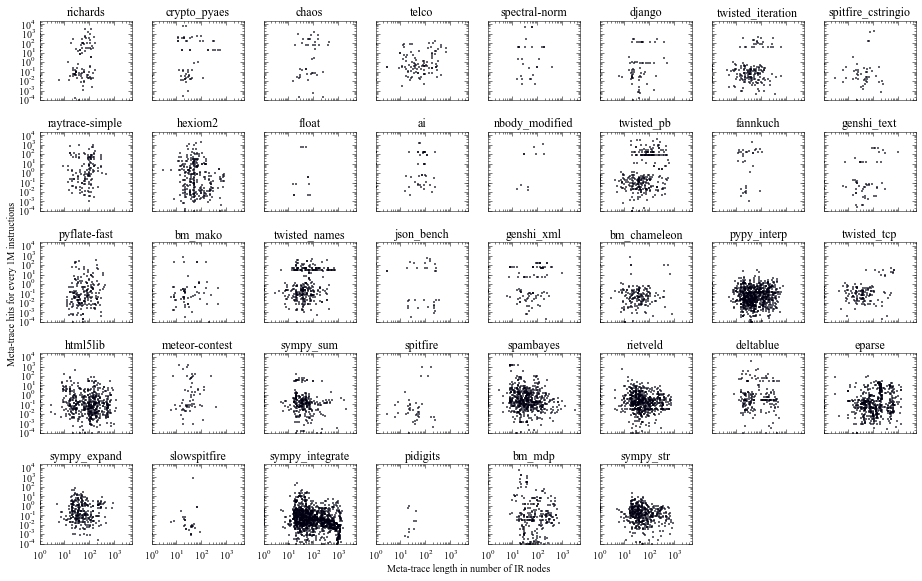

In [18]:
plot_out_dir = "plot_out/"
ncols = 8
bmarks = sorted( all_loops["x86"].keys() )
# remove bmarks
bmarks.remove( "bm_icbd" )
bmarks.remove( "go" )
# temp:
#bmarks = ["richards", "ai"]
nrows = (len(bmarks) + ncols - 1) / ncols

fig, axes = plt.subplots( nrows=nrows, ncols=ncols,
                          figsize=(1.6*ncols,1.6*nrows), )
i = 0
ir_len_df = pd.DataFrame(columns=["bmark", "len", "pctl_len"])
for bmark, vs_cpy, vs_nojit in ordered_bmarks:
    print bmark,
    if bmark not in bmarks:
        print "(skip)",
        continue
    #for i, bmark in enumerate(bmarks):
    if bmark not in bmark_num_insts:
        print "{} not found in bmark_num_insts, skipping".format( bmark )
        continue
    if nrows == 1:
        ax = axes[i]
    else:
        ax = axes[i/ncols,i%ncols]

    len_, pctl_len, total_usage = get_ir_len_usage( bmark, num_insts=bmark_num_insts[bmark] )
    
    ir_len_df = ir_len_df.append( {"bmark": bmark, "len": len_, "pctl_len": pctl_len, 
                                   "total_usage": total_usage}, ignore_index=True )
    
    plot_hit_vs_len( bmark, num_insts=bmark_num_insts[bmark], xlim=5000,
                     ylim=25000, loglog=True, ax=ax )
    #plot_ir_distro( bmark, num_insts=bmark_num_insts[bmark], ax=ax )
    i += 1
    
# Delete the axes that aren't used.
for j in xrange(i, nrows * ncols):
    if nrows == 1:
        ax = axes[j]
    else:
        ax = axes[j/ncols,j%ncols]
    fig.delaxes(ax)

fig.text(0.5, 0.0, 'Meta-trace length in number of IR nodes', ha='center', fontname="Times New Roman")
fig.text(0.0, 0.5, 'Meta-trace hits for every 1M instructions', va='center', rotation='vertical', 
         fontname="Times New Roman")
fig.tight_layout()
fig.savefig(plot_out_dir + "fig-pypybmark-trace-use-distro.svg" )

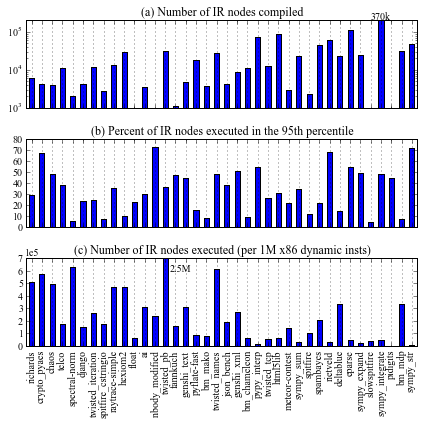

In [19]:
fig, axes = plt.subplots( nrows=3, ncols=1,
                          figsize=(6, 6), )
ir_len_df.plot(kind="bar", x="bmark", y="len", legend=None, sharex=True,
               #ylim=(0,200000),
               ylim=(1000,200000),
               log=True, ax=axes[0])
axes[0].text(33, 220000, "370k", fontname="Times New Roman")
axes[0].set_title("(a) Number of IR nodes compiled", fontname="Times New Roman")
ir_len_df["pctl_pct"] = ir_len_df["pctl_len"] * 100.0 / ir_len_df["len"]
ir_len_df.plot(kind="bar", x="bmark", y="pctl_pct", legend=None, sharex=True, 
               #ylim=(0,400),
               #log=True, ylim=(10,None),
               ax=axes[1])
#axes[1].text(34.5, 350, "490", fontname="Times New Roman") # 1200, 490
#axes[1].text(26.5, 350, "1200", fontname="Times New Roman") # 1200, 490
axes[1].set_title("(b) Percent of IR nodes executed in the 95th percentile", fontname="Times New Roman")
ir_len_df.plot(kind="bar", x="bmark", y="total_usage", legend=None, sharex=True, 
               #ylim=(0,600),
               #log=True, ylim=(10,None),
               ylim=(0,700000),
               ax=axes[2])
axes[2].set_title("(c) Number of IR nodes executed (per 1M x86 dynamic insts)", fontname="Times New Roman")


axes[2].text(13.5, 600000, "2.5M", fontname="Times New Roman")
#from matplotlib.ticker import ScalarFormatter
#yfmt = ScalarFormatter()
#axes[2].yaxis.set_major_formatter(xfmt)
axes[2].ticklabel_format(axis='y', scilimits=(0, 0), style='sci')
# 2500000

output_file = plot_out_dir + "fig-pypybmark-ir-total-len.svg"
axes[0].xaxis.set_label_text("")
axes[1].xaxis.set_label_text("")
axes[2].xaxis.set_label_text("")
axes[0].grid(axis="x")
axes[1].grid(axis="x")
axes[2].grid(axis="x")
# Set font to serif
for label in axes[1].get_yticklabels():
    label.set_fontname("Times New Roman")
for label in axes[2].get_yticklabels():
    label.set_fontname("Times New Roman")
for label in axes[2].get_xticklabels():
    label.set_fontname("Times New Roman")
#ax.yaxis.set_label_text("avg num of asm insts"

fig.tight_layout()
fig.savefig(output_file)

In [20]:
def get_asm_nlines( asm ):
    if asm is None or asm.isspace() or asm == "":
        return 0
    return asm.count( "\n" ) + 1

def op_type_hist( loops ):
    hist_dict = {}
    static_ops = 0
    dyn_ops = 0
    for l in loops:
        for o in l.operations:
            if o.name == "debug_merge_point":
                continue
            opname = o.name
            # remove the trailing _r, _f, _i
            if opname.endswith("_r") or opname.endswith("_f") or opname.endswith("_i") or opname.endswith("_n"):
                opname = opname[:-2]
            if opname not in hist_dict:
                s, d = 0, 0
            else:
                s, d = hist_dict[ opname ]
            hist_dict[ opname ] = s + 1, d + l.count
            static_ops += 1
            dyn_ops += l.count
    return hist_dict, static_ops, dyn_ops

def asm_hist( loops, asm_dict={} ):
    static_ops = 0
    prev_asm_nlines = 0

    for l in loops:
        try:
            l.force_asm()
        except AttributeError:
            print "WARNING: no force_asm, skipping"
            
        # assign and normalize for the missing nlines
        zero_cnt = 0
        for i,o in reversed( list( enumerate( l.operations ) ) ):
            if o.name == "debug_merge_point":
              continue
            o.asm_nlines = get_asm_nlines( o.asm )
            if o.asm_nlines == 0:
                zero_cnt += 1
                #print "zero at idx", i
            elif zero_cnt:
                #print "nonzero at idx {} value {}".format( i, o.asm_nlines )
                new_asm_nlines = float( o.asm_nlines ) / (zero_cnt + 1)
                for j in xrange( i, i + zero_cnt + 1 ):
                    #print "unzeroing at idx {} to value {}".format( j, new_asm_nlines )
                    l.operations[j].asm_nlines = new_asm_nlines
                zero_cnt = 0

        for o in l.operations:
            if o.name == "debug_merge_point":
                continue
            prev_asm_nlines = get_asm_nlines( o.asm )
            # 
            opname = o.name
            # remove the trailing _r, _f, _i
            if opname.endswith("_r") or opname.endswith("_f") or opname.endswith("_i") or opname.endswith("_n"):
                opname = opname[:-2]
            s, a = asm_dict.get( opname, (0, 0) )
            asm_dict[ opname ] = s + 1, a + o.asm_nlines
            static_ops += 1
    return asm_dict, static_ops

In [21]:
def plot_op_type_hist( hist_dict, num_bars=0, bmark="?", figsize=(14,6), omit_static=False, output_file=None ):
    df = pd.DataFrame( hist_dict.items(), columns=["op", "f"] )
    df['freq'], df['dyn_freq'] = zip( *df['f'] )
    del df['f']
    if not omit_static:
        df = df.sort_values( "freq", ascending=False )
        df.plot( kind='bar', x='op', y='freq', figsize=figsize, title="static op frequency of " + bmark )

    df = df.sort_values( "dyn_freq", ascending=False )
    if num_bars > 0:
        df = df[ : num_bars ]
    ax = df.plot( kind='bar', x='op', y='dyn_freq', figsize=figsize, title="dynamic op frequency of " + bmark )
    if output_file is not None:
        output_file = plot_out_dir + output_file + ".svg"
        fig = ax.get_figure()
        ax.xaxis.set_label_text("")
        ax.set_ylabel("Ratio", fontname="Times New Roman")
        ax.set_title("")
        ax.legend().set_visible(False)
        fig.tight_layout()
        fig.savefig(output_file)
        # Set font to serif
        for label in ax.get_xticklabels():
            label.set_fontname("Times New Roman")
        for label in ax.get_yticklabels():
            label.set_fontname("Times New Roman")

    
def plot_asm_hist( asm_dict, num_bars=0, bmark="?", figsize=(14,6), omit_static=False, output_file=None ):
    df = pd.DataFrame( asm_dict.items(), columns=["op", "a"] )
    df["freq"], df["asm_cnt"] = zip( *df["a"] )
    df["avg_asm_cnt"] = df["asm_cnt"] / df["freq"]
    df = df.sort_values( "avg_asm_cnt", ascending=False )
    if num_bars > 0:
        df = df[ : num_bars ]
    ax = df.plot( kind='bar', x='op', y='avg_asm_cnt', figsize=figsize, title="average asm/ir of " + bmark )
    if output_file is not None:
        output_file = plot_out_dir + output_file + ".svg"
        fig = ax.get_figure()
        ax.xaxis.set_label_text("")
        ax.set_ylabel("Avg num of x86 instructions", fontname="Times New Roman")
        ax.set_title("")
        ax.legend().set_visible(False)
        # Set font to serif
        for label in ax.get_xticklabels():
            label.set_fontname("Times New Roman")
        for label in ax.get_yticklabels():
            label.set_fontname("Times New Roman")
            
        fig.tight_layout()
        fig.savefig(output_file)

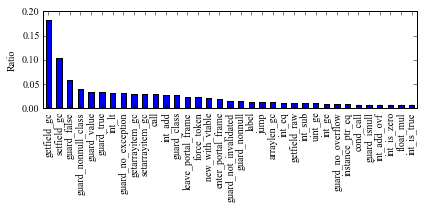

In [22]:
def get_mean_op_type_hist():
    bmarks = sorted( all_loops["x86"].keys() )
    hist = {}
    for bmark in bmarks:
        loops = all_loops["x86"][bmark][1]
        hist_dict, static_ops, dynamic_ops = op_type_hist( loops )
        for op, (freq, dyn_freq) in hist_dict.items():
            # remove the trailing _r, _f, _i
            if op.endswith("_r") or op.endswith("_f") or op.endswith("_i") or op.endswith("_n"):
                op = op[:-2]
            if op not in hist:
                s, d = 0.0, 0.0
            else:
                s, d = hist[ op ]
            hist[op] = s + float( freq ) / static_ops / len(bmarks), \
                        d + float( dyn_freq ) / dynamic_ops / len(bmarks)
    return hist
hist = get_mean_op_type_hist()
#plot_op_type_hist( hist, bmark="all" )
plot_op_type_hist( hist, bmark="all (weighted)", omit_static=True,
                   figsize=(6, 3), num_bars = 35,
                   output_file="fig-pypybmark-ir-freqs" )

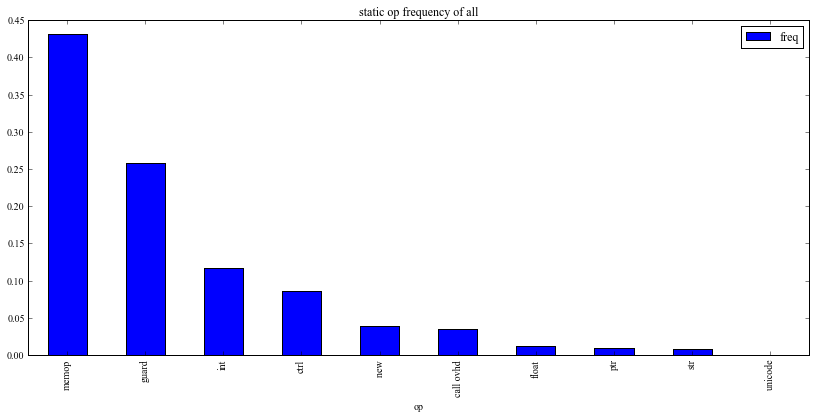

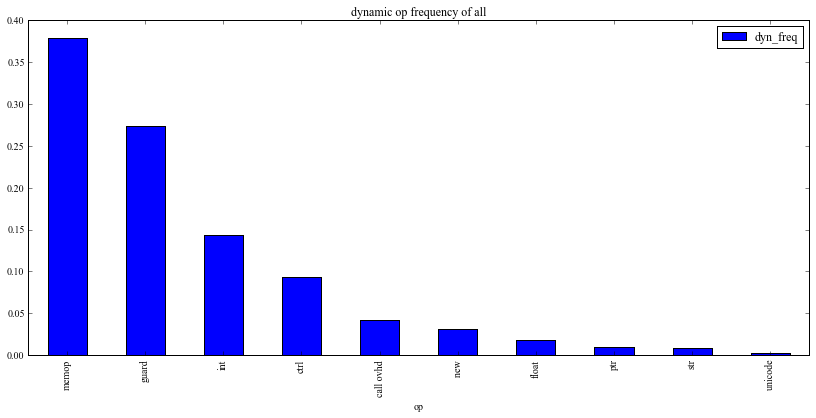

In [23]:
def categorize_hist( hist_dict ):
    cat = {"getfield_" : "memop",
           "setfield_" : "memop",
           "getarrayitem" : "memop",
           "setarrayitem" : "memop",
           "guard_"    : "guard",
           "int_"      : "int",
           "uint_"     : "int",
           "new"       : "new",
           "call"      : "call ovhd",
           "cond_call" : "call ovhd",
           "instance_ptr_eq" : "ptr",
           "ptr"       : "ptr",
           "unicode"   : "unicode",
           "str"       : "str",
           "copystr"   : "str",
           "copyunicode" : "unicode",
           "same_as"   : "int",
           "getinterior" : "memop",
           "setinterior" : "memop",
           "label"     : "ctrl",
           "jump"      : "ctrl",
           "finish"    : "ctrl",
           "float"     : "float",
           "leave_portal_frame": "ctrl",
           "force_token" : "ctrl",
           "enter_portal_frame" : "ctrl",
           "keepalive" : "ctrl",
           "cast_int_to_float" : "float",
           "cast_float_to_int" : "float",
           "gc_load" : "memop",
           "arraylen" : "memop",
           "save_exc" : "ctrl",
           "restore_exception" : "ctrl",
           "save_exception" : "ctrl"
           }
    new_hist_dict = {}
    for op, (sf, df) in hist_dict.items():
        for c_k, c_v in cat.items():
            if op.startswith( c_k ):
                op = c_v
                break
        if op in new_hist_dict:
            s, d = new_hist_dict[op]
        else:
            s, d = 0.0, 0.0
        new_hist_dict[op] = s + sf, d + df
    return new_hist_dict
plot_op_type_hist( categorize_hist( hist ), bmark="all" )

In [24]:
# average asm histogram
x86_asm_hist = {}
bmarks = sorted( all_loops["x86"].keys() )
for bmark in bmarks:
    print "disasm:", bmark
    loops = all_loops["x86"][bmark][1]
    asm_hist( loops, asm_dict=x86_asm_hist )




disasm: ai
disasm: bm_chameleon
disasm: bm_icbd
disasm: bm_mako
disasm: bm_mdp
disasm: chaos
disasm: crypto_pyaes
disasm: deltablue
disasm: django
disasm: eparse
disasm: fannkuch
disasm: float
disasm: genshi_text
disasm: genshi_xml
disasm: go
disasm: hexiom2
disasm: html5lib
disasm: json_bench
disasm: meteor-contest
disasm: nbody_modified
disasm: pidigits
disasm: pyflate-fast
disasm: pypy_interp
disasm: raytrace-simple
disasm: richards
disasm: rietveld
disasm: slowspitfire
disasm: spambayes
disasm: spectral-norm
disasm: spitfire
disasm: spitfire_cstringio
disasm: sympy_expand
disasm: sympy_integrate
disasm: sympy_str
disasm: sympy_sum
disasm: telco
disasm: twisted_iteration
disasm: twisted_names
disasm: twisted_pb
disasm: twisted_tcp


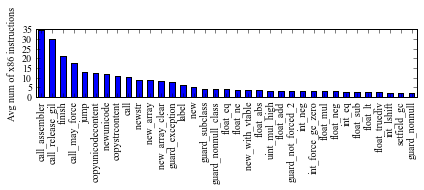

In [25]:
# plot
plot_asm_hist( x86_asm_hist, bmark="all", figsize=(6, 2.5),
               num_bars=35,
               output_file="fig-pypybmark-ir-asm")

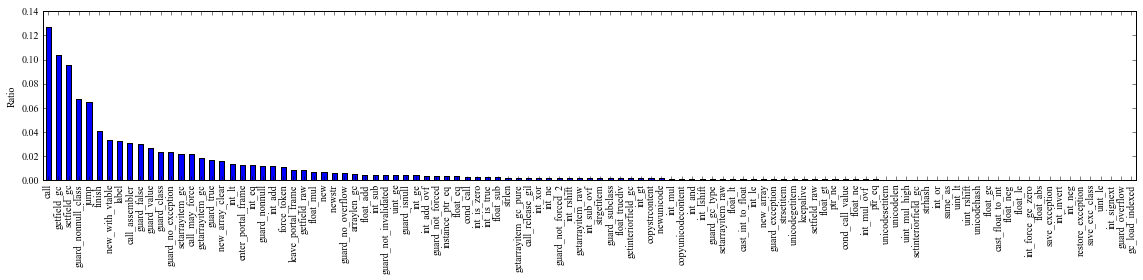

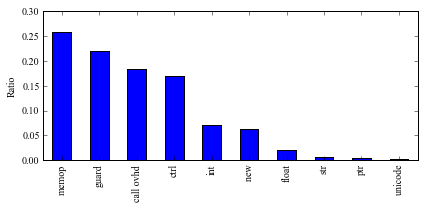

In [26]:
# Weighted asm histogram (multipled by num asm instructions)
def get_asm_weighted( hist_dict ):
    new_hist_dict = {}
    # total static and dyn freqs so that we can re-normalize
    total_sf = 0.0
    total_df = 0.0
    for op, (sf, df) in hist_dict.items():
        asm_freq, asm_cnt = x86_asm_hist[op]
        asm_num_insts = (0.0 + asm_cnt) / asm_freq
        sf *= asm_num_insts
        df *= asm_num_insts
        total_sf += sf
        total_df += df
        new_hist_dict[op] = (sf, df)
    # Re-normalize so that we can add up to 1.0.
    for op, (sf, df) in new_hist_dict.items():
        new_hist_dict[op] = (sf / total_sf, df / total_df)
    return new_hist_dict

plot_op_type_hist( get_asm_weighted( hist ), bmark="all (weighted)", omit_static=True,
                   figsize=(16, 4),
                   output_file="fig-pypybmark-ir-weighted-freqs" )
plot_op_type_hist( categorize_hist( get_asm_weighted( hist ) ), bmark="all (weighted)",
                   omit_static=True, figsize=(6, 3),
                   output_file="fig-pypybmark-ir-weighted-freqs-cat")

In [27]:
categorize_hist( get_asm_weighted( hist ) )

{'call ovhd': (0.18112070493991417, 0.1840236407262255),
 'ctrl': (0.13777204691842077, 0.16996408324795176),
 'float': (0.01391470936000713, 0.020777622750897538),
 'guard': (0.21540690885374658, 0.22026016086723843),
 'int': (0.05871776447158336, 0.07105173627825692),
 'memop': (0.30137301744692846, 0.25830323928596166),
 'new': (0.07982452790612292, 0.06339049985698847),
 'ptr': (0.004611723355968368, 0.004322505255732208),
 'str': (0.006515478763314751, 0.0056375863736932265),
 'unicode': (0.0007431179839933258, 0.0022689253570541672)}

In [28]:
def get_mean_op_type_hist_by_bmark():
    bmarks = sorted( all_loops["x86"].keys() )
    hist = {}
    for bmark in bmarks:
        loops = all_loops["x86"][bmark][1]
        hist_dict, static_ops, dynamic_ops = op_type_hist( loops )
        hist[bmark] = hist_dict
    return hist
hist_by_bmark = get_mean_op_type_hist_by_bmark()

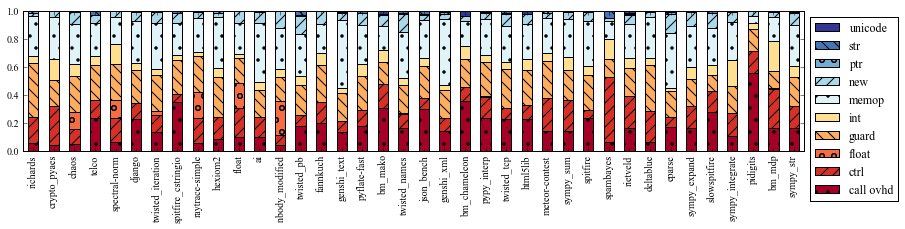

In [29]:
overall_cat_hist = categorize_hist( get_asm_weighted( hist ) )
def plot_cat_hist_by_bmark( hist_by_bmark ):

    def get_dyn_freq( hist ):
        new_hist = {}
        for op, (_, df) in hist.items():
            new_hist[op] = df
        return new_hist

    # Get categorized hist
    cat_hist_by_bmark = {}
    i = 0
    for bmark, _, _ in ordered_bmarks:
        hist = hist_by_bmark[ bmark ]
        #for bmark, hist in hist_by_bmark.items():
        cat_hist_by_bmark[bmark] = get_dyn_freq(
                categorize_hist( get_asm_weighted( hist_by_bmark[bmark] ) ) )
        cat_hist_by_bmark[bmark]["order"] = i 
        i += 1



    df = pd.DataFrame( cat_hist_by_bmark )
    df = df.T.sort_values("order")
    # write the output to file
    out_file = "csv_out/pypybmark_ir_weighted_by_bmark.csv"
    df.to_csv(out_file)
    del df["order"]
    # transpose because columns and rows are the opposite order.
    ax = df.plot(kind="bar", stacked=True, figsize=(14,2.5), ylim=(0,1.0), 
                   color=['#a50026','#d73027','#f46d43','#fdae61','#fee090','#e0f3f8','#abd9e9','#74add1','#4575b4','#313695'],
                 )
    
    num_cols = 38
    hatch_list = [".", "//", "o", "\\\\", " "]
    i = 0
    for p in ax.patches:
        hatch_idx = (i / num_cols) % len( hatch_list )
        p.set_hatch( hatch_list[hatch_idx] )     
        i += 1

    handles, labels = ax.get_legend_handles_labels()
    plt.rc('font',family='Times New Roman')
    lgd = ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left')
    # Set font to serif
    #for label in ax.get_yticklabels():
    #    label.set_fontname("Times New Roman")
    #for label in ax.get_xticklabels():
    #    label.set_fontname("Times New Roman")
    #ax.legend( loc="center left", bbox_to_anchor=(1, 0.5) )
    output_file = plot_out_dir + "fig-pypybmark-ir-weighted-by-bmark" + ".svg"
    fig = ax.get_figure()
    #fig.tight_layout()
    fig.savefig(output_file, bbox_extra_artists=(lgd,), bbox_inches='tight')

    
plot_cat_hist_by_bmark( hist_by_bmark )

In [30]:
def plot_fun_call_hist( df, run = "binarytrees.python" ):
    run_df = df[ df.run == run ]
    run_df_c = run_df[ df.type == "c" ].iloc[0]
    num_inst = run_df_c.num_inst
    call_df = run_df[ ( ( run_df.phase == 83 ) | ( run_df.phase == 98 ) ) & ( run_df.call_fun_name != "empty" ) ]

    call_df[ "num_inst_ratio" ] = call_df.num_inst * 100.0 / num_inst

    call_df = call_df.groupby( "call_fun_name" ).sum().sort_values( by="num_inst", ascending=False )

    if call_df.empty:
        print "run {} is empty, not plotting".format( run )
        return
    ax = call_df.plot( kind="bar", y="num_inst_ratio", title=run )
    ax.set_ylabel( "percent of all instructions" )

In [31]:
runs = pin_df.groupby("run").first().index
#for run in runs:
#    plot_fun_call_hist( pin_df, run )

In [32]:
# Loop over the benchmarks if any of them occupy a certain percentage.
threshold = 10.0 # 10%
# Contains tuples of (bmark, percent, function)
fun_table = []
runs = pin_df.groupby("run").first().index
for run in runs:
#run = "meteor-contest"
    run_df = pin_df[ pin_df.run == run ]

    run_df_c = run_df[ pin_df.type == "c" ].iloc[0]
    num_inst = run_df_c.num_inst
    call_df = run_df[ ( ( run_df.phase == 83 ) | ( run_df.phase == 98 ) ) & ( run_df.call_fun_name != "empty" ) ]
    call_df[ "num_inst_ratio" ] = call_df.num_inst * 100.0 / num_inst
    call_df = call_df.groupby( "call_fun_name" ).sum().sort_values( by="num_inst", ascending=False )
    call_df = call_df[ call_df.num_inst_ratio >= threshold ]

    
    for fun_name, r in call_df.iterrows():
        fun_table.append( (run, r.num_inst_ratio, fun_name) )

print fun_table

/Users/berkin/work/venvs/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/Users/berkin/work/venvs/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


[('ai', 19.406459289690112, 'pypy_g_get_storage_from_list__v238___simple_call__funct'), ('bm_chameleon', 17.897096877371514, 'pypy_g_ll_call_lookup_function__v1073___simple_call__fu'), ('bm_mako', 28.738391242155178, 'pypy_g_unicode_encode_ucs1_helper'), ('bm_mako', 14.032600880099407, 'pypy_g_ll_call_lookup_function__v1148___simple_call__fu'), ('bm_mdp', 16.803392742710962, 'pypy_g_ll_call_lookup_function__v1148___simple_call__fu'), ('deltablue', 12.9972758906174, 'pypy_g_ll_pop_nonneg__dum_checkidxConst_listPtr_Signed'), ('django', 17.573027283216167, 'pypy_g_replace__unicode_unicode'), ('django', 15.699826794393449, 'pypy_g_ll_call_lookup_function__v1148___simple_call__fu'), ('eparse', 30.091000083496613, 'pypy_g_assembler_call_helper_94'), ('eparse', 12.312030189896173, 'pypy_g_ll_join__rpy_stringPtr_Signed_arrayPtr'), ('fannkuch', 19.951430752269207, 'pypy_g_IntegerListStrategy_setslice_1'), ('fannkuch', 15.885714086826329, 'pypy_g_IntegerListStrategy__fill_in_with_sliced_items'),

In [33]:
def sanitize_fun_name( fun_name ):
    if fun_name.startswith( "pypy_g_" ):
        fun_name = fun_name[ len("pypy_g_") : ]
    idx = fun_name.find("___")
    if idx != -1:
        fun_name = fun_name[:idx]
    fun_name = fun_name.replace("__", ".")
    return fun_name

for bmark, pcent, fun_name in fun_table:
    bmark = bmark.replace("_", "\_")
    fun_name = sanitize_fun_name( fun_name ).replace("_", "\_")
    print "  {}  & {:0.1f}  &  {} \\\\".format( bmark, pcent, fun_name )

  ai  & 19.4  &  get\_storage\_from\_list.v238 \\
  bm\_chameleon  & 17.9  &  ll\_call\_lookup\_function.v1073 \\
  bm\_mako  & 28.7  &  unicode\_encode\_ucs1\_helper \\
  bm\_mako  & 14.0  &  ll\_call\_lookup\_function.v1148 \\
  bm\_mdp  & 16.8  &  ll\_call\_lookup\_function.v1148 \\
  deltablue  & 13.0  &  ll\_pop\_nonneg.dum\_checkidxConst\_listPtr\_Signed \\
  django  & 17.6  &  replace.unicode\_unicode \\
  django  & 15.7  &  ll\_call\_lookup\_function.v1148 \\
  eparse  & 30.1  &  assembler\_call\_helper\_94 \\
  eparse  & 12.3  &  ll\_join.rpy\_stringPtr\_Signed\_arrayPtr \\
  fannkuch  & 20.0  &  IntegerListStrategy\_setslice\_1 \\
  fannkuch  & 15.9  &  IntegerListStrategy.fill\_in\_with\_sliced\_items \\
  genshi\_xml  & 12.4  &  ll\_call\_lookup\_function.v1148 \\
  hexiom2  & 10.8  &  IntegerListStrategy.safe\_find \\
  html5lib  & 13.1  &  W\_UnicodeObject\_descr\_translate \\
  json\_bench  & 18.5  &  raw\_encode\_basestring\_ascii \\
  json\_bench  & 10.6  &  ll\_append

/Users/berkin/work/venvs/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/berkin/work/venvs/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/berkin/work/venvs/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

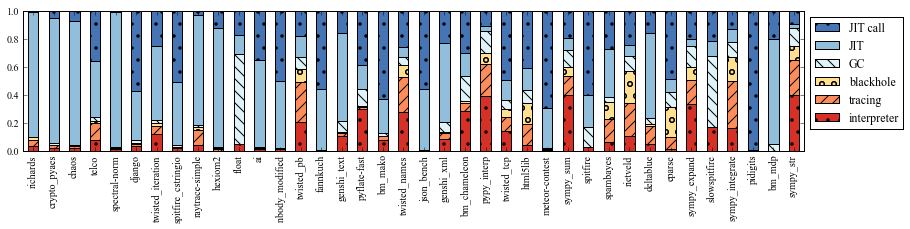

In [34]:
phases = {
    110: "b",
    120: "G",
    122: "g",
    130: "t",
    132: "T",
    160: "j",
    86:  "j",
    0:   "i",
    10:  "i",
    90:  "C",
    92:  "C",
    94:  "C",
    96:  "C",
    100: "C",
    102: "C",
    104: "C",
    106: "C",
    170: "C"
}

def categorize( r ):
    phase = r.phase
    if phase in phases:
        return phases[ phase ]
    if phase == 83 or phase == 98:
        if r.call_fun_name == "empty":
            return "j"
        else:
            return "c"
    assert False, "unknown phase {}".format( phase )

def plot_pin_jit_phases( pin_df ):
    pin_phase_df = pin_df[ pin_df.type == "p" ]
    pin_phase_df["_category"] = pin_phase_df.apply( categorize, axis=1 )

    category_labels = {
        "i": "0: interpreter",
        "t": "1: tracing",
        "T": "1: tracing",
        "b": "2: blackhole",
        "g": "3: GC",
        "G": "3: GC",
        "j": "4: JIT",
        "c": "5: JIT call",
        "C": "5: JIT call"
    }
    pin_phase_df["category"] = pin_phase_df.apply( lambda r : category_labels[ r._category ], axis=1 )
    pin_phase_df[ "num_inst_ratio" ] = pin_phase_df.apply(
        lambda r: r.num_inst * 1.0 / pin_df[ (pin_df.type == "c") & (pin_df.run == r.run) ].iloc[0].num_inst,
        axis=1 )
    cat_df = pin_phase_df.sort_values( by="category" ).groupby( ["run", "category"] ).sum()
    return cat_df
    ax = cat_df.unstack().plot( kind="bar", stacked=True, y="num_inst_ratio", ylim=(0,1.0), 
                                figsize=(14,2.5),
                                color=['#d73027','#fc8d59','#fee090','#e0f3f8','#91bfdb','#4575b4'])
    #ax.legend( loc="center left", bbox_to_anchor=(1, 0.5) )
    handles, labels = ax.get_legend_handles_labels()
    ax.xaxis.set_label_text("")
    labels = [ lab[3:] for lab in labels ]
    lgd = ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left')
    #ax.legend( loc="center left", bbox_to_anchor=(1, 0.5) )
    output_file = plot_out_dir + "fig-pypybmark-phase-by-bmark" + ".svg"
    fig = ax.get_figure()
    #fig.tight_layout()
    fig.savefig(output_file, bbox_extra_artists=(lgd,), bbox_inches='tight')

# Uncomment below to generate cat_df first
cat_df = plot_pin_jit_phases( pin_df )
cat_df_us = cat_df.unstack()

i = 0
bmark_order = {}
for bmark, _, _ in ordered_bmarks:
    bmark_order[bmark] = i
    i += 1
orders = []
for bmark in cat_df_us.index:
    orders.append( bmark_order.get( bmark, -1 ) )
cat_df_us["order"] = orders
cat_df_us = cat_df_us.sort_values( "order" )
cat_df_us = cat_df_us.drop(["bm_icbd"])
del cat_df_us["order"]
#print cat_df_us
out_file = "csv_out/pypybmark_phase_by_bmark.csv"
cat_df_us.to_csv( out_file )
ax = cat_df_us.plot( kind="bar", stacked=True, y="num_inst_ratio", ylim=(0,1.0), 
                                figsize=(14,2.5),
                                color=['#d73027','#fc8d59','#fee090','#e0f3f8','#91bfdb','#4575b4'])
num_cols = 38
hatch_list = [".", "//", "o", "\\\\", " "]
i = 0
for p in ax.patches:
    hatch_idx = (i / num_cols) % len( hatch_list )
    p.set_hatch( hatch_list[hatch_idx] )     
    i += 1
    
#ax.legend( loc="center left", bbox_to_anchor=(1, 0.5) )
handles, labels = ax.get_legend_handles_labels()
ax.xaxis.set_label_text("")
labels = [ lab[3:] for lab in labels ]
lgd = ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left')
#ax.legend( loc="center left", bbox_to_anchor=(1, 0.5) )
output_file = plot_out_dir + "fig-pypybmark-phase-by-bmark" + ".svg"
fig = ax.get_figure()
#fig.tight_layout()
fig.savefig(output_file, bbox_extra_artists=(lgd,), bbox_inches='tight')

richards
sympy_str


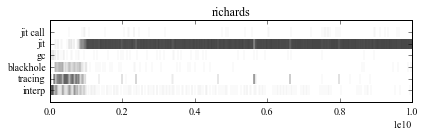

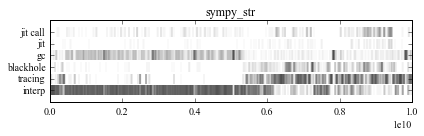

In [35]:

activity_phases = {
    110: "b",
    120: "G",
    122: "g",
    130: "t",
    132: "T",
    160: "j",
    83:  "c",
    86:  "j",
    0:   "i",
    10:  "i",
    90:  "C",
    92:  "C",
    94:  "C",
    96:  "C",
    98:  "c",
    100: "C",
    102: "C",
    104: "C",
    106: "C",
    170: "C"
}
activity_plot_idxs = {
        "i": 0,
        "t": 1,
        "T": 1,
        "b": 2,
        "g": 3,
        "G": 3,
        "j": 4,
        "c": 5,
        "C": 5
}

def plot_activity_and_warmup( activity_df, activity_nojit_df = None, bmark="bmark" ):
    mp_plot = False
    cum_mp_plot = False
    num_plots = 1 + (1 if mp_plot else 0) + (1 if cum_mp_plot else 0)
    ax_idx = 0
    fig, axs = plt.subplots(num_plots, sharex=True)
    
    if mp_plot:
        merge_point_plot_cols = ["interp_merge_point_count", "jit_merge_point_count", "tracing_merge_count"]
        if activity_nojit_df is not None:
            activity_df["interp_nojit_merge_point_count"] = activity_nojit_df["interp_merge_point_count"]
            merge_point_plot_cols.append("interp_nojit_merge_point_count")
        # merge point reduce samples by doing a rolling mean
        merge_point_df = activity_df.rolling(100).mean().dropna()
        merge_point_df.plot(kind="line", x="num_insts", 
                         y=merge_point_plot_cols,
                         title=bmark, color=['#a6cee3','#1f78b4','#b2df8a','#33a02c'],
                         ax=axs[ax_idx] )
        ax_idx += 1
    
    if cum_mp_plot:
        # Jit vs nojit plot
        activity_df["cum_jit_mpc"] = (activity_df.jit_merge_point_count.cumsum() + 
                                      activity_df.interp_merge_point_count.cumsum() +
                                      activity_df.tracing_merge_count.cumsum() )
        activity_df["cum_nojit_mpc"] = activity_df.interp_nojit_merge_point_count.cumsum()
        activity_df["cum_jit_nojit"] = activity_df.cum_jit_mpc / activity_df.cum_nojit_mpc
        #activity_df.plot(x="num_insts", y="cum_jit_mpc")
        #activity_df.plot(x="num_insts", y="cum_nojit_mpc")
        activity_df.plot(x="num_insts", y="cum_jit_nojit", ax=axs[ax_idx])
        ax_idx += 1
    
    ax = axs if num_plots == 1 else axs[-1]
    # Phase plot
    activity_df["Phase"] = activity_df.apply( lambda x: activity_plot_idxs[ activity_phases[x.phase] ], axis=1 )
    # fewer samples
    activity_df = activity_df[ activity_df.num_insts % 1000000 == 0 ]
    num_plot_samples = len(activity_df)
    categories = ["interp", "tracing", "blackhole", "gc", "jit", "jit call"]
    ax.set_yticklabels( [""] + categories )
    line_width = 500.0 / num_plot_samples
    activity_df.plot( kind="scatter", x="num_insts", y="Phase", c="black", title=bmark,
                      xlim=(0,1e10), ylim=(-1, 6), marker="|", s=100, lw=line_width,
                      figsize=(6,2), ax=ax )
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    return fig
    #return activity_df



def plot_all_activity( activity_dir, activity_nojit_dir ):
    ext = ".activity"
    files = os.listdir( activity_dir )
    activity_bmarks = map( lambda x: x[:-len(ext)], 
                            filter( lambda x: x.endswith(ext), os.listdir(activity_dir) ) )
    # comment to enable all
    activity_bmarks = ["richards", "sympy_str"]
    for bmark in activity_bmarks:
        print bmark
        activity_df = pd.read_csv( activity_dir + bmark + ext )
        if ( bmark + ext ) not in os.listdir(activity_nojit_dir):
            print "nojit of {} not found in {}".format( bmark, activity_nojit_dir )
            activity_nojit_df = None
        else:
            activity_nojit_df = pd.read_csv( activity_nojit_dir + bmark + ext )
        fig = plot_activity_and_warmup( activity_df, activity_nojit_df, bmark=bmark )
        fig.tight_layout()
        fig.savefig(plot_out_dir + "fig-phase-" + bmark + ".png")



plot_all_activity( activity_dir, activity_nojit_dir )

## Warmup plot

richards vs_cpy 51.1806514123 pypy_jit 11328150000.0 5844952560.6 cpy 579782096297.0 1008.12919163
cpy breakeven point:  499950000.0
nojit breakeven point:  499950000.0 crypto_pyaes vs_cpy 30.1795885633 pypy_jit 13661450000.0 5243961939.46 cpy 412296940177.0 1271.88960879
cpy breakeven point:  499950000.0
nojit breakeven point:  499950000.0 chaos vs_cpy 27.1791849484 pypy_jit 18185050000.0 6082298668.78 cpy 494254837246.0 1230.59972517
cpy breakeven point:  499950000.0
nojit breakeven point:  499950000.0 telco vs_cpy 27.0874885282 pypy_jit 10553250000.0 2002231344.36 cpy 285861038310.0 700.421210319
cpy breakeven point:  760650000.0
nojit breakeven point:  499950000.0 spectral-norm vs_cpy 25.9417850613 pypy_jit 11351550000.0 4123123979.89 cpy 294479470213.0 1400.13970309
cpy breakeven point:  499950000.0
nojit breakeven point:  499950000.0 django vs_cpy 18.2255200519 pypy_jit 15961950000.0 1294660267.52 cpy 290914839793.0 445.030672357
cpy breakeven point:  499950000.0
nojit breakeven 

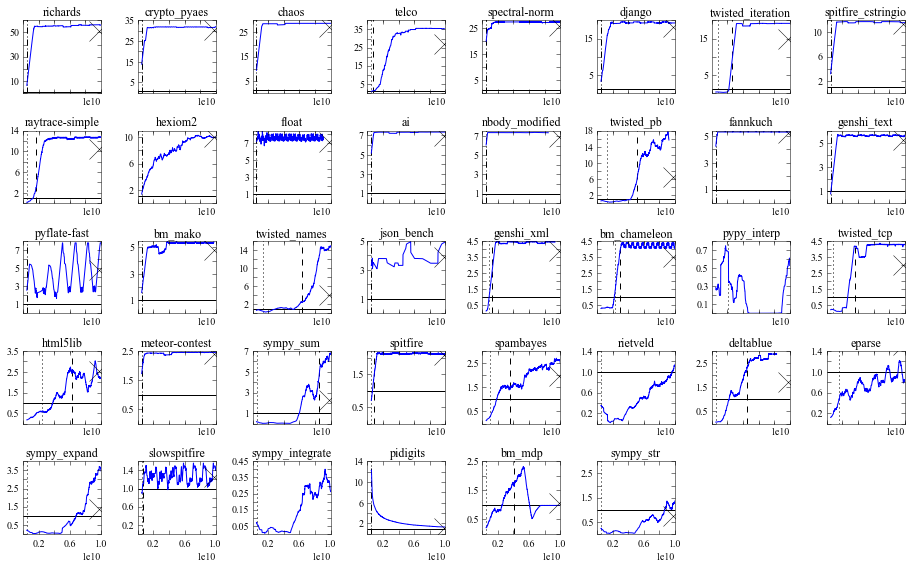

In [36]:
def plot_jit_warmup( activity_df, activity_nojit_df, ax, vs_cpy=None,
                     rolling=None, bmark="bmark" ):
    #fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
    activity_df["interp_nojit_merge_point_count"] = activity_nojit_df["interp_merge_point_count"]    
    # Jit vs nojit plot
    #plot_col = "cum_jit_nojit"
    # jit vs cpython plot
    plot_col = "jit_cpy"
    
        
    if rolling is not None:
        activity_df = activity_df.rolling(rolling).mean().dropna()

    activity_df["jit_nojit"] = (activity_df.jit_merge_point_count + 
                                activity_df.interp_merge_point_count +
                                activity_df.tracing_merge_count ) / \
                                activity_df.interp_nojit_merge_point_count


    activity_df["jit_mpc"] = (activity_df.jit_merge_point_count + 
                              activity_df.interp_merge_point_count +
                              activity_df.tracing_merge_count )
    activity_df["cum_jit_mpc"] = (activity_df.jit_merge_point_count.cumsum() + 
                                  activity_df.interp_merge_point_count.cumsum() +
                                  activity_df.tracing_merge_count.cumsum() )
    activity_df["cum_nojit_mpc"] = activity_df.interp_nojit_merge_point_count.cumsum()
    activity_df["cum_jit_nojit"] = activity_df.cum_jit_mpc / activity_df.cum_nojit_mpc

    
    pypy_jit_total_insts = activity_df.iloc[-1].num_insts
    pypy_jit_total_mpc = activity_df.iloc[-1].cum_jit_mpc
    sampling_period = 100000
    cpy_total_insts = pypy_jit_total_insts * vs_cpy
    cpy_mpc_per_sample = sampling_period * pypy_jit_total_mpc / cpy_total_insts
    print "vs_cpy", vs_cpy, "pypy_jit", pypy_jit_total_insts, pypy_jit_total_mpc, "cpy", \
          cpy_total_insts, cpy_mpc_per_sample
    # pypy jit vs cpython curve
    activity_df["jit_cpy"] = activity_df.jit_mpc / cpy_mpc_per_sample
    
    # Find the breakeven points
    activity_df["cpy_mpc"] = cpy_mpc_per_sample
    activity_df["cum_cpy_mpc"] = activity_df.cpy_mpc.cumsum()
    activity_df["cum_jit_cpy_dif"] = activity_df.cum_jit_mpc - activity_df.cum_cpy_mpc
    activity_df["cum_jit_nojit_dif"] = activity_df.cum_jit_mpc - activity_df.cum_nojit_mpc
    
    cpy_bkeven_df = activity_df[ activity_df.cum_jit_cpy_dif >= 0 ]
    nojit_bkeven_df = activity_df[ activity_df.cum_jit_nojit_dif >= 0 ]
    
    cpy_bkeven = None
    if len( cpy_bkeven_df ) > 0:
        cpy_bkeven = cpy_bkeven_df.iloc[0].num_insts
        print "cpy breakeven point: ", cpy_bkeven
    else:
        print "cpy breakeven point doesn't exist",
    
    nojit_bkeven = None
    if len( nojit_bkeven_df ) > 0:
        nojit_bkeven = nojit_bkeven_df.iloc[0].num_insts
        print "nojit breakeven point: ", nojit_bkeven,
    else:
        print "nojit breakeven point doesn't exist",
        
    
    #activity_df.plot(x="num_insts", y="cum_jit_mpc")
    #activity_df.plot(x="num_insts", y="cum_nojit_mpc")
    # Plot the first 10B instructions (100000 samples)
    activity_df[:100000].plot(x="num_insts", y=plot_col, ax=ax,
                     sharex=True, xlim=(0,1e10), ylim=(0,None), title=bmark, legend=False )

    # Plot the totally warmed up speedup.
    final_speedup = activity_df["cum_jit_nojit"].iloc[-1]
    # Disabling the dot for vs. nojit
    #ax.plot([9.8e9], [final_speedup], marker='o', markersize=5, color="red")
    if vs_cpy is not None:
        ax.plot([9.8e9], [vs_cpy], marker='x', markersize=20, lw=2, color="black")
    
    if cpy_bkeven is not None:
        ax.vlines(cpy_bkeven, 0, 100, linestyles='dashed' )
        #ax.plot([cpy_bkeven, 0], [cpy_bkeven, 100], color="black", linestyle="-", lw=10)
    if nojit_bkeven is not None:
        ax.vlines(nojit_bkeven, 0, 100, linestyles='dotted' )

        #ax.plot([nojit_bkeven, 0], [nojit_bkeven, 100], color="black", linestyle=".", lw=10)
            
    ax.hlines(1, 0, 1e10, linestyles='solid' )

    ax.set_title(bmark, fontname="Times New Roman")
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['top'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    
    # Display half of the tick labels
    for label in ax.get_xticklabels()[::2]:
        label.set_visible(False)
    for label in ax.get_yticklabels()[::2]:
        label.set_visible(False)
    # Set font to serif
    for label in ax.get_xticklabels():
        label.set_fontname("Times New Roman")
    for label in ax.get_yticklabels():
        label.set_fontname("Times New Roman")

    ax.xaxis.set_label_text("")
    ax.yaxis.set_label_text("")
    #return activity_df

plot_out_dir = "plot_out/"
def plot_all_warmup( activity_dir, activity_nojit_dir ):
    ext = ".activity"
    files = os.listdir( activity_dir )
    activity_bmarks = map( lambda x: x[:-len(ext)], 
                            filter( lambda x: x.endswith(ext), os.listdir(activity_dir) ) )
    #activity_bmarks = activity_bmarks[:8]
    # icbd doesn't work...
    activity_bmarks.remove( "bm_icbd" )
    #activity_bmarks = ["pypy_interp"]
    ncols = 8

    nrows = (len(activity_bmarks) + ncols - 1) / ncols
    fig, axes = plt.subplots( nrows=nrows, ncols=ncols, 
                              figsize=(1.6*ncols,1.6*nrows) )

    #for i, bmark in enumerate( activity_bmarks ):
    i = 0
    for bmark, vs_cpy, vs_nojit in ordered_bmarks:
        print bmark,
        if bmark not in activity_bmarks:
            print "(skip)",
            continue
        if nrows == 1:
            ax = axes[i]
        else:
            ax = axes[i/ncols,i%ncols]
        activity_df = pd.read_csv( activity_dir + bmark + ext )
        if ( bmark + ext ) not in os.listdir(activity_nojit_dir):
            print "nojit of {} not found in {}".format( bmark, activity_nojit_dir )
            activity_nojit_df = None
        else:
            activity_nojit_df = pd.read_csv( activity_nojit_dir + bmark + ext )
        plot_jit_warmup( activity_df, activity_nojit_df, ax, vs_cpy=vs_cpy, 
                         rolling=10000, bmark=bmark )
        i += 1
      
    # Delete the axes that aren't used.
    for j in xrange(i, nrows * ncols):
        if nrows == 1:
            ax = axes[j]
        else:
            ax = axes[j/ncols,j%ncols]
        fig.delaxes(ax)
        
    fig.tight_layout()
    fig.savefig(plot_out_dir + "fig-pypybmark-warmup.svg" )

plot_all_warmup( activity_dir, activity_nojit_dir )

In [7]:
def get_merge_point_stats(activity_df):
    # Get the number of insts per sample.
    num_insts_per_sample = activity_df.iloc[1]["num_insts"]
    
    imp_total = 0
    jmp_total = 0
    tmp_total = 0
    imp_total_pure = 0
    jmp_total_pure = 0
    tmp_total_pure = 0
    imp_num_insts = 0
    jmp_num_insts = 0
    tmp_num_insts = 0

    # Go through the rows one by one.
    for i, r in activity_df.iterrows():
        imp = r["interp_merge_point_count"]
        jmp = r["jit_merge_point_count"]
        tmp = r["tracing_merge_count"]

        imp_total += imp
        jmp_total += jmp
        tmp_total += tmp

        # Only take into account samples that have one source of merge points.
        if imp > 0 and jmp == 0 and tmp == 0:
            imp_total_pure += imp
            imp_num_insts += num_insts_per_sample
        elif jmp > 0 and imp == 0 and tmp == 0:
            jmp_total_pure += jmp
            jmp_num_insts += num_insts_per_sample
        elif tmp > 0 and imp == 0 and jmp == 0:
            tmp_total_pure += tmp
            tmp_num_insts += num_insts_per_sample
    return (imp_total, imp_total_pure, imp_num_insts, 
            jmp_total, jmp_total_pure, jmp_num_insts,
            tmp_total, tmp_total_pure, tmp_num_insts)


NameError: name 'activity_df' is not defined

In [8]:
def aggregate_merge_point_stats( activity_dir ):
    ext = ".activity"
    files = os.listdir( activity_dir )
    activity_bmarks = map( lambda x: x[:-len(ext)], 
                            filter( lambda x: x.endswith(ext), os.listdir(activity_dir) ) )
    # icbd doesn't work...
    activity_bmarks.remove( "bm_icbd" )
    
    # XXX
    #activity_bmarks = ["ai", "richards"]
    
    mp_df = pd.DataFrame(columns=("app", "imp_total", "imp_total_pure", "imp_num_insts",
                                         "jmp_total", "jmp_total_pure", "jmp_num_insts",
                                         "tmp_total", "tmp_total_pure", "tmp_num_insts"))

    for bmark, vs_cpy, vs_nojit in ordered_bmarks:
        print bmark,
        if bmark not in activity_bmarks:
            #print "(skip)",
            continue
        activity_df = pd.read_csv( activity_dir + bmark + ext )
        mp_stats = get_merge_point_stats(activity_df)
        mp_df = mp_df.append(
                     {"app": bmark,
                      "imp_total": mp_stats[0],
                      "imp_total_pure": mp_stats[1], 
                      "imp_num_insts": mp_stats[2],
                      "jmp_total": mp_stats[3], 
                      "jmp_total_pure": mp_stats[4], 
                      "jmp_num_insts": mp_stats[5],     
                      "tmp_total": mp_stats[6], 
                      "tmp_total_pure": mp_stats[7], 
                      "tmp_num_insts": mp_stats[8] }, ignore_index=True)

    return mp_df

mp_df = aggregate_merge_point_stats( activity_dir )

richards crypto_pyaes chaos telco spectral-norm django twisted_iteration spitfire_cstringio raytrace-simple hexiom2 float ai nbody_modified twisted_pb fannkuch genshi_text pyflate-fast bm_mako twisted_names json_bench genshi_xml bm_chameleon pypy_interp twisted_tcp html5lib meteor-contest sympy_sum spitfire spambayes rietveld deltablue eparse sympy_expand slowspitfire sympy_integrate pidigits bm_mdp sympy_str


In [9]:
mp_df["imp_bc_per_inst"] = mp_df["imp_total_pure"] / mp_df["imp_num_insts"]
mp_df["jmp_bc_per_inst"] = mp_df["jmp_total_pure"] / mp_df["jmp_num_insts"]
mp_df["tmp_bc_per_inst"] = mp_df["tmp_total_pure"] / mp_df["tmp_num_insts"]
mp_df["imp_tmp_bc_ratio"] = mp_df["imp_bc_per_inst"] / mp_df["tmp_bc_per_inst"]

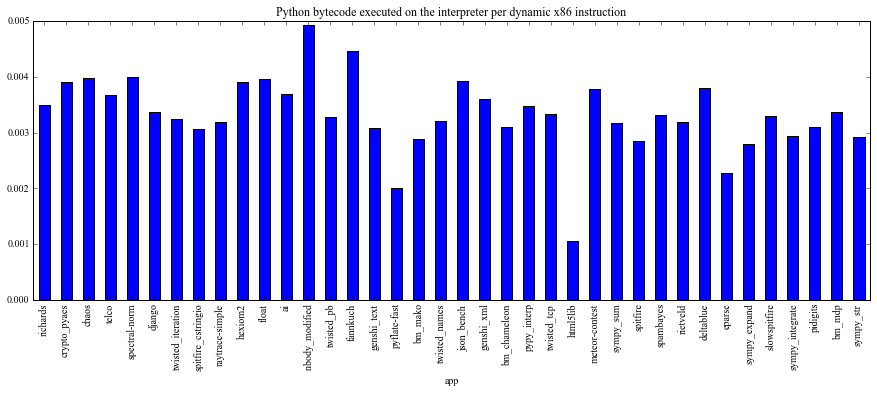

In [101]:
mp_df.plot(kind="bar", x="app", y="imp_bc_per_inst", legend=None, figsize=(15,5),  title="Python bytecode executed on the interpreter per dynamic x86 instruction")

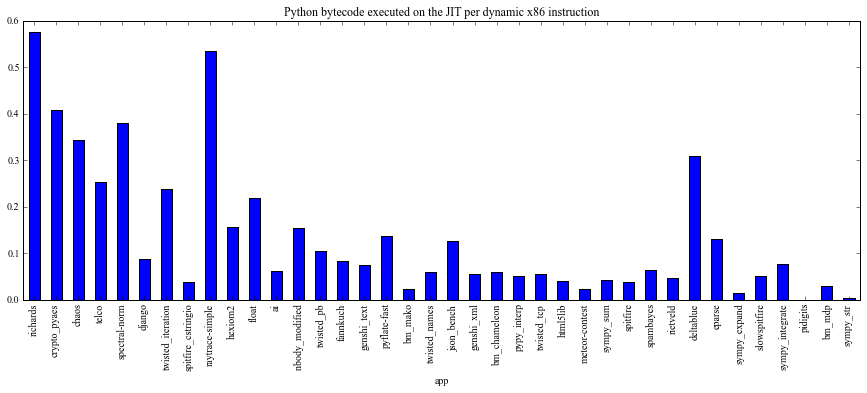

In [102]:
mp_df.plot(kind="bar", x="app", y="jmp_bc_per_inst", legend=None, figsize=(15,5),  title="Python bytecode executed on the JIT per dynamic x86 instruction")

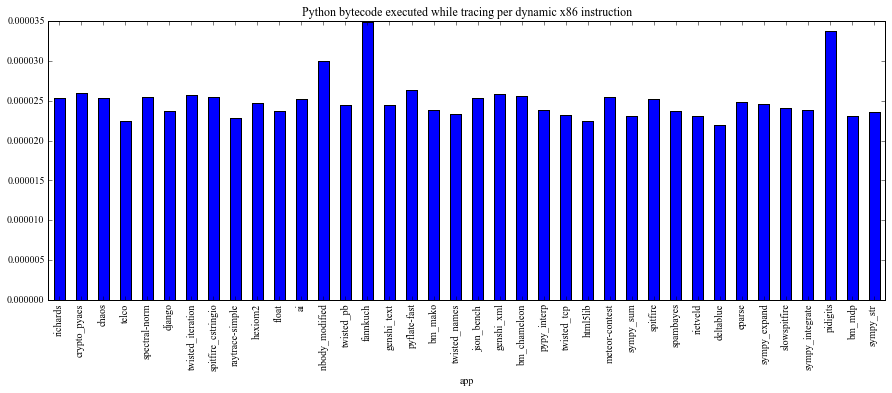

In [103]:
mp_df.plot(kind="bar", x="app", y="tmp_bc_per_inst", legend=None, figsize=(15,5),  title="Python bytecode executed while tracing per dynamic x86 instruction")

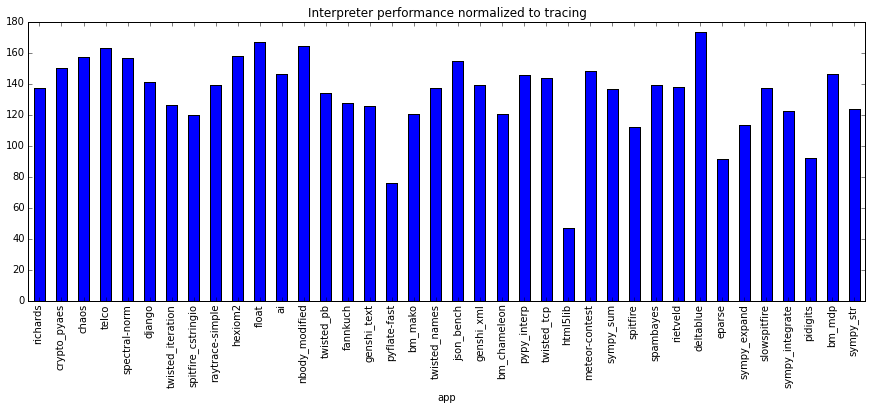

In [10]:
mp_df.plot(kind="bar", x="app", y="imp_tmp_bc_ratio", legend=None, figsize=(15,5),  title="Interpreter performance normalized to tracing")

In [93]:
mp_df

,app,imp_total,imp_total_pure,imp_num_insts,jmp_total,jmp_total_pure,jmp_num_insts,tmp_total,tmp_total_pure,tmp_num_insts,imp_bc_per_inst,jmp_bc_per_inst,tmp_bc_per_inst
0,richards,1466441,441752,126300000,6128056327,6036272419,10464400000,4422,4370,172200000,0.00349764,0.576839,2.53775e-05
1,ai,465890,204622,55400000,721539576,711263706,11333700000,582,556,22100000,0.00369354,0.0627565,2.51584e-05


# Perf outs

In [38]:
for i, r in pypybmark_result_df.iterrows():
    def format_time( val ):
        if val >= 10.0:
            return int(val)
        else:
            return "{:0.1g}".format( val )
    #print r
    app_san = r.app.replace("_", "\_")
    print "{} & {} & {} & {:0.1f} & {} & {:0.1f}  \\\\".format(
            app_san, format_time(r.cpython_avg),
            format_time(r.pypy_nojit_avg), r.pypy_nojit_norm,
            format_time(r.pypy_jit_avg), r.pypy_jit_norm)

mn_df = pypybmark_result_df.mean()
print " &  &  &  \\textbf{{{:0.1f}}} &  & \\textbf{{{:0.1f}}} \\\\" \
        .format( (mn_df.cpython_avg / mn_df.pypy_nojit_avg),
                 (mn_df.cpython_avg / mn_df.pypy_jit_avg ) )

ai & 0.3 & 1 & 0.3 & 0.04 & 7.0  \\
bm\_chameleon & 0.07 & 0.2 & 0.4 & 0.02 & 3.5  \\
bm\_icbd & 87 & 71 & 1.2 & 74 & 1.2  \\
bm\_mako & 0.1 & 0.3 & 0.4 & 0.02 & 4.8  \\
bm\_mdp & 10 & 70 & 0.2 & 10 & 1.1  \\
chaos & 0.3 & 0.7 & 0.4 & 0.01 & 27.2  \\
sphinx & 137 & 134 & 1.0 & 131 & 1.0  \\
crypto\_pyaes & 2 & 4 & 0.4 & 0.06 & 30.2  \\
deltablue & 0.02 & 0.05 & 0.4 & 0.01 & 1.7  \\
django & 0.7 & 1 & 0.5 & 0.04 & 18.2  \\
eparse & 0.8 & 1 & 0.6 & 0.5 & 1.5  \\
fannkuch & 1 & 2 & 0.6 & 0.2 & 5.2  \\
float & 0.4 & 0.8 & 0.5 & 0.05 & 7.1  \\
genshi\_text & 0.1 & 0.4 & 0.3 & 0.02 & 5.2  \\
genshi\_xml & 0.2 & 0.8 & 0.3 & 0.06 & 3.9  \\
go & 0.6 & 2 & 0.3 & 0.3 & 2.4  \\
hexiom2 & 149 & 442 & 0.3 & 14 & 10.1  \\
html5lib & 11 & 27 & 0.4 & 4 & 2.5  \\
json\_bench & 3 & 31 & 0.1 & 0.9 & 3.9  \\
meteor-contest & 0.2 & 0.6 & 0.4 & 0.1 & 2.4  \\
nbody\_modified & 0.3 & 0.9 & 0.3 & 0.04 & 6.9  \\
pidigits & 12 & 11 & 1.1 & 10 & 1.1  \\
pyflate-fast & 2 & 4 & 0.5 & 0.4 & 4.8  \\
pypy\_interp & 0.3

In [39]:
# From the filename, return the raw dataframe and overall statistics.
def process_perf_csv( filename, perf2=False ):
    perf_col_names = ["time", "counts", "units", "events", "dk1", "dk2"]
    # Skip first two rows because they don't contain data.
    raw = pd.read_csv( filename, header=None, names=perf_col_names, skiprows=2 )
    # Get elapsed by getting the last entry.
    elapsed = raw.iloc[-1].time
    if raw.counts.dtype != "int64":
        # Missing data are represented with "<not counted>". Drop those.
        raw = raw[ raw.counts != "<not counted>" ]
        raw.counts = raw.counts.astype( int )
    #replace them with NaNs.
    #raw = raw.replace("<not counted>", np.nan)
    # The <not counted> turns the row into string, and that fails in sum(), so convert to int.
    #raw.counts = raw.counts.astype( int )
    # Getting the total execution time and various metrics.
    rawgb = raw.groupby( "events" ).sum()
    instructions = rawgb.loc["instructions"].counts
    cycles = rawgb.loc["cycles"].counts
    if not perf2:
        branches = rawgb.loc["branches"].counts
        branch_misses = rawgb.loc["branch-misses"].counts
        return raw, elapsed, instructions, cycles, branches, branch_misses
    else:
        l1d_loads = rawgb.loc["L1-dcache-loads"].counts
        l1d_misses = rawgb.loc["L1-dcache-load-misses"].counts
        l1i_loads = rawgb.loc["L1-icache-loads"].counts
        l1i_misses = rawgb.loc["L1-icache-load-misses"].counts
        return raw, elapsed, instructions, cycles, l1d_loads, l1d_misses, l1i_loads, l1i_misses

In [40]:
def load_perf_df( cpython_perf_dir, pypy_perf_dir, pypy_nojit_perf_dir, perf2=False ):
    perf_rows = []
    # load cpython, jit and nojit results
    for interp, perf_dir in [ ("cpython", cpython_perf_dir), 
                              ("pypy_jit", pypy_perf_dir), 
                              ("pypy_nojit", pypy_nojit_perf_dir) ]:
        for perf_file in os.listdir( perf_dir ):
            if not perf_file.endswith( "_perf.log" ):
                continue
            app = perf_file[: -len("_perf.log") ]
            if not perf2:
                raw_perf_df, elapsed, instructions, cycles, branches, branch_misses = \
                        process_perf_csv( perf_dir + perf_file )
                # For now ignoring the raw df.
                perf_rows.append( { "app": app, "interp" : interp, 
                                    "elapsed": elapsed, "instructions" : instructions,
                                    "cycles": cycles, "branches": branches,
                                    "branch_misses": branch_misses } )
            else:
                raw_perf_df, elapsed, instructions, cycles, l1d_loads, l1d_misses, l1i_loads, l1i_misses = \
                        process_perf_csv( perf_dir + perf_file, perf2=perf2 )
                # For now ignoring the raw df.
                perf_rows.append( { "app": app, "interp" : interp, 
                                    "elapsed": elapsed, "instructions" : instructions,
                                    "cycles": cycles, "l1d_loads": l1d_loads,
                                    "l1d_misses": l1d_misses,
                                    "l1i_loads": l1i_loads,
                                    "l1i_misses": l1i_misses } )

    return pd.DataFrame( perf_rows )

In [41]:
perf_df = load_perf_df( cpython_perf_dir, pypy_perf_dir, pypy_nojit_perf_dir )

In [42]:
perf2_df = load_perf_df( cpython_perf2_dir, pypy_perf2_dir, pypy_nojit_perf2_dir, perf2=True )

In [43]:
perf2_df["l1d_loads_per_inst"] = perf2_df["l1d_loads"] / perf2_df["instructions"]
perf2_df["l1d_misses_per_inst"] = perf2_df["l1d_misses"] / perf2_df["instructions"]
perf2_df["l1i_loads_per_inst"] = perf2_df["l1i_loads"] / perf2_df["instructions"]
perf2_df["l1i_misses_per_inst"] = perf2_df["l1i_misses"] / perf2_df["instructions"]


In [44]:
perf2_df.groupby("interp").mean()

,cycles,elapsed,instructions,l1d_loads,l1d_misses,l1i_loads,l1i_misses,l1d_loads_per_inst,l1d_misses_per_inst,l1i_loads_per_inst,l1i_misses_per_inst
interp,,,,,,,,,,,
cpython,1.610447e+11,64.237201,2.340599e+11,6.920172e+10,1.947039e+09,1.070661e+11,4.398352e+09,0.300266,0.010561,0.471021,0.025615
pypy_jit,8.523894e+10,35.395507,9.943284e+10,2.897560e+10,1.922768e+09,3.917085e+10,2.714778e+09,0.293792,0.019141,0.428351,0.035996
pypy_nojit,5.819479e+10,22.958396,6.828040e+10,2.170183e+10,5.277431e+08,3.197232e+10,2.014588e+09,0.314610,0.013193,0.485005,0.040550


In [45]:
perf2_df.groupby("interp").std()

,cycles,elapsed,instructions,l1d_loads,l1d_misses,l1i_loads,l1i_misses,l1d_loads_per_inst,l1d_misses_per_inst,l1i_loads_per_inst,l1i_misses_per_inst
interp,,,,,,,,,,,
cpython,2.615551e+11,99.190744,3.850501e+11,1.146941e+11,3.073398e+09,1.901766e+11,6.685541e+09,0.029783,0.008582,0.100719,0.018520
pypy_jit,2.186401e+11,83.750662,2.936606e+11,9.155255e+10,4.755860e+09,1.137074e+11,4.989243e+09,0.044433,0.017329,0.087180,0.033320
pypy_nojit,1.931353e+11,72.975515,2.566639e+11,8.331815e+10,9.879574e+08,1.173556e+11,5.675499e+09,0.039480,0.008228,0.079792,0.021385


In [46]:
perf_df["ipc"] = perf_df["instructions"] / perf_df["cycles"]
perf_df["br_per_inst"] = perf_df["branches"] / perf_df["instructions"]
perf_df["br_miss_rate"] = perf_df["branch_misses"] / perf_df["branches"]
perf_df["br_miss_per_inst"] = perf_df["branch_misses"] / perf_df["instructions"]

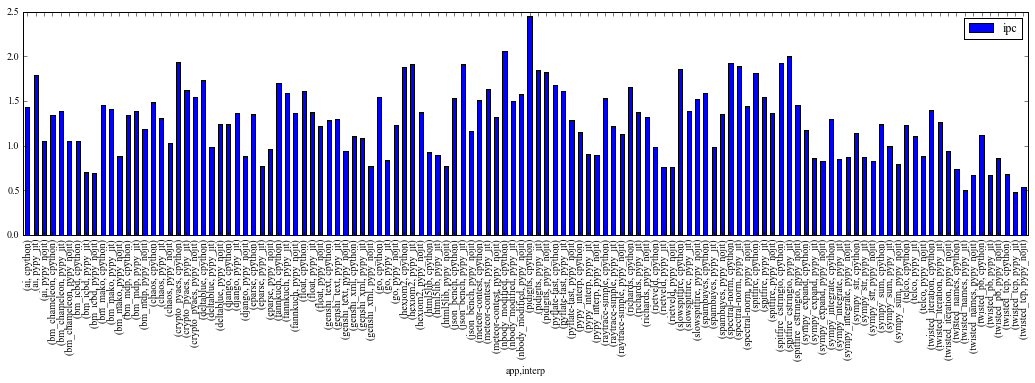

In [47]:
perf_df.groupby(["app", "interp"]).first().plot(kind="bar", y="ipc", figsize=(18,4))

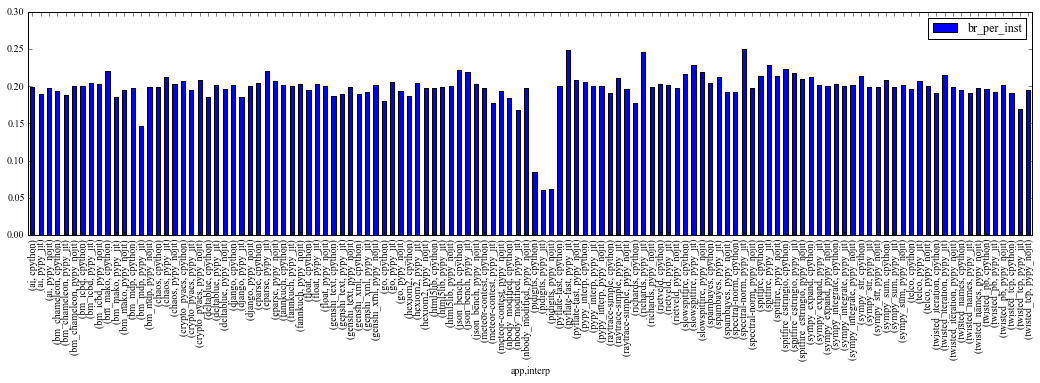

In [48]:
perf_df.groupby(["app", "interp"]).first().plot(kind="bar", y="br_per_inst", figsize=(18,4))

In [49]:
#for i, r in pypybmark_result_df.iterrows():
for bmark, _, _ in ordered_bmarks:
    tmp_df = pypybmark_result_df[pypybmark_result_df.app == bmark]
    if len( tmp_df ) == 0:
        print "no result for {} found, skipping".format( bmark )
        continue
    r = tmp_df.iloc[0]
    def format_time( val ):
        if val >= 10.0:
            return int(val)
        else:
            return "{:0.1g}".format( val )
        
    def print_result( interp_name, norm_val=None ):
        if interp_name == "cpython":
            avg_time = r.cpython_avg
        elif interp_name == "pypy_jit":
            avg_time = r.pypy_jit_avg
        elif interp_name == "pypy_nojit":
            avg_time = r.pypy_nojit_avg
        print " & {}".format( format_time(avg_time) ),
        if norm_val is not None:
            print " & {:0.1f}".format( norm_val ),
        try:
            perf_row = perf_df[ (perf_df.app == r.app) & (perf_df.interp == interp_name) ].iloc[0]
            #print " & {:0.2f} & {:0.0f} & {:0.1f}".format( perf_row.ipc, perf_row.br_per_inst*1000, 
            #                                              perf_row.br_miss_per_inst*1000 ),
            print " & {:0.2f} & {:0.1f}".format( perf_row.ipc,  
                                                          perf_row.br_miss_per_inst*1000 ),
        except IndexError:
            print " & ? & ? & ?",
    
    #print r
    app_san = r.app.replace("_", "\_")
    print "{}".format( app_san ),
    print_result( "cpython" ),
    print_result( "pypy_nojit", r.pypy_nojit_norm ),
    print_result( "pypy_jit", r.pypy_jit_norm ),
    print " \\\\"
    #print "{} & {} & {} & {:0.1f} & {} & {:0.1f}  \\\\".format(
    #        app_san, format_time(r.cpython_avg),
    #        format_time(r.pypy_nojit_avg), r.pypy_nojit_norm,
    #        format_time(r.pypy_jit_avg), r.pypy_jit_norm)

#perf_restricted_df = perf_df[perf_df.apply( 
#    lambda r: r.app in ordered_bmarks_list, axis=1 )]

#mn_df = perf_restricted_df.groupby("interp").mean()
#print "\\hline"
#print "\\textbf{{{}}} & & {} & {} & {} & ".format(mn_df)
#print " & \textbf{{{}}} & {} & {} & {} & & \textbf{{{}}} "
mn_df = pypybmark_result_df.mean()
print " &  &  &  \\textbf{{{:0.1f}}} &  & \\textbf{{{:0.1f}}} \\\\" \
        .format( (mn_df.cpython_avg / mn_df.pypy_nojit_avg),
                 (mn_df.cpython_avg / mn_df.pypy_jit_avg ) )
#print " &  &  &  \\textbf{{{:0.1f}}} &  & \\textbf{{{:0.1f}}} \\\\" \
#        .format( (mn_df.cpython_avg / mn_df.pypy_nojit_avg),
#                 (mn_df.cpython_avg / mn_df.pypy_jit_avg ) )

html5lib  & 11  & 0.93 & 9.7  & 27  & 0.4  & 0.77 & 7.0  & 4  & 2.5  & 0.89 & 4.6  \\
 &  &  &  \textbf{0.5} &  & \textbf{1.7} \\


In [50]:
ordered_bmarks_list = [x for x,_,_ in ordered_bmarks]
pypybmark_result_restrict_df = \
        pypybmark_result_df[pypybmark_result_df.apply( lambda r: r.app in ordered_bmarks_list, axis=1 )]

In [51]:
#pypybmark_result_restrict_df

In [52]:
def geomean( df ):
    #print col
    #reduce(lambda x, y: 0, col)
    def geomean_col( col_l ):
        col = df[col_l]
        try:
            return reduce(lambda x,y: x*y, col) ** (1.0 / len(col))
        except TypeError:
            return "a"
    return pd.DataFrame([map(geomean_col , df)], columns=df.columns)

def harmonic_mean( df ):
    def hmean_col( col_l ):
        col = df[col_l]
        try:
            return float(len(col)) / reduce(lambda x,y: x + (1.0/y), col, 0)
        except TypeError:
            return "a"
    return pd.DataFrame([map(hmean_col , df)], columns=df.columns)
#geomean = lambda d: lambda n: reduce(lambda x,y: x*y, n.ipc) ** (1.0 / len(n))
#perf_df.groupby("interp").apply( geomean )
perf_df.groupby("interp").apply( harmonic_mean )

,,app,branch_misses,branches,cycles,elapsed,instructions,interp,ipc,br_per_inst,br_miss_rate,br_miss_per_inst
interp,,,,,,,,,,,,
cpython,0,a,1.829035e+08,9.781262e+09,3.470322e+10,15.397350,4.973988e+10,a,1.357001,0.192466,0.012598,0.001578
pypy_jit,0,a,2.152824e+07,2.236381e+09,8.315584e+09,3.785739,1.079190e+10,a,1.097570,0.189851,0.007524,0.001068
pypy_nojit,0,a,3.115595e+08,1.637605e+10,8.089519e+10,32.822852,8.382795e+10,a,1.017998,0.190007,0.018257,0.002205


In [53]:
perf_df.groupby("interp").mean()

,branch_misses,branches,cycles,elapsed,instructions,ipc,br_per_inst,br_miss_rate,br_miss_per_inst
interp,,,,,,,,,
cpython,1.248020e+09,4.551040e+10,1.597954e+11,63.094107,2.343226e+11,1.455446,0.196745,0.027729,0.005489
pypy_jit,2.709237e+08,1.691354e+10,8.489896e+10,34.571771,1.000043e+11,1.249578,0.199325,0.017946,0.003586
pypy_nojit,3.500936e+09,1.321711e+11,5.610974e+11,213.735213,6.632683e+11,1.097048,0.197326,0.028164,0.005633


In [54]:
perf_restricted_df = perf_df[perf_df.apply( 
    lambda r: r.app in ordered_bmarks_list, axis=1 )]

perf_restricted_df.groupby("interp").mean()

,branch_misses,branches,cycles,elapsed,instructions,ipc,br_per_inst,br_miss_rate,br_miss_per_inst
interp,,,,,,,,,
cpython,1.338762e+09,2.716959e+10,1.486463e+11,56.562214,1.375098e+11,0.925081,0.197583,0.049274,0.009736
pypy_jit,2.433682e+08,1.047734e+10,5.903754e+10,22.451265,5.259236e+10,0.890829,0.199218,0.023228,0.004627
pypy_nojit,2.014441e+09,5.740399e+10,3.692070e+11,139.015162,2.859420e+11,0.774476,0.200754,0.035092,0.007045


In [55]:
perf_restricted_df.groupby("interp").std()

,branch_misses,branches,cycles,elapsed,instructions,ipc,br_per_inst,br_miss_rate,br_miss_per_inst
interp,,,,,,,,,
cpython,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pypy_jit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pypy_nojit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
perf_df.groupby("interp").std()

,branch_misses,branches,cycles,elapsed,instructions,ipc,br_per_inst,br_miss_rate,br_miss_per_inst
interp,,,,,,,,,
cpython,2.675628e+09,7.536069e+10,2.592653e+11,97.609832,3.848435e+11,0.368951,0.021306,0.014079,0.002744
pypy_jit,6.767422e+08,4.350702e+10,2.169509e+11,82.598485,2.939424e+11,0.414020,0.030454,0.012756,0.002556
pypy_nojit,1.025794e+10,3.846714e+11,1.604232e+12,601.943043,1.924569e+12,0.297897,0.022599,0.009972,0.001987


# PAPI

In [57]:
# Load all valid runs.
def load_papi( papi_dir ):
    df = pd.DataFrame()
    files = os.listdir( papi_dir )
    for papi_file in files:
        if not papi_file.endswith(".csv"):
            continue
        run = papi_file[:-len(".csv")]
        tmp_df = pd.read_csv( papi_dir + papi_file)
        tmp_df["run"] = run
        df = df.append( tmp_df, ignore_index=True )
    return df


In [58]:
papi_jit_dir = "data/pypybmarks/papi_out_5_27_jit/"
papi_nojit_dir = "data/pypybmarks/papi_out_5_28_nojit/"
papi_jit_df = load_papi( papi_jit_dir )

In [59]:
papi_nojit_df = load_papi( papi_nojit_dir )

In [60]:
papi_jit_df

,mode,phase,cyc,ins,br,brc,brcm,count,run
0,sum,10,464500,264849,54980,39429,2524,2,ai
1,sum,110,65873669,28003005,6244309,3375909,338451,39034,ai
2,sum,111,35677797,17258629,3894719,2072995,285875,35189,ai
3,sum,112,29737729,8891563,1844195,1054073,123716,3235,ai
4,sum,113,1090600,614653,128564,68475,8481,610,ai
5,sum,122,40120224,38704324,10039717,8758451,441871,1206,ai
6,sum,123,4205102667,7878229802,1489742596,1202479701,10718033,1206,ai
7,sum,130,33789276,32643104,7118046,4969482,340175,14,ai
8,sum,131,107608,19139,4360,2418,814,14,ai
9,sum,132,34629406,33062488,7220412,5108459,355433,18,ai


In [61]:
# G = major collection, g = minor collection. T = tracing for bridges, t = tracing for loops. 
# Lump these together for now.
phase_begins = {
    110: "b",
    #120: "G",
    120: "g",
    122: "g",
    130: "t",
    #132: "T",
    132: "t",
    160: "j",
}
phase_ends = {
    111: "b",
    112: "b",
    113: "b",
    #121: "G",
    121: "g",
    123: "g",
    131: "t",
    #133: "T",
    133: "t",
    161: "j",
}
phase_nums = {
    "i": 0,
    "g": 1,
    "G": 1,
    "t": 2,
    "T": 2,
    "b": 3,
    "j": 4,
}

In [62]:
def plot_papi_time_breakdown( df, app_name, get_df=False ):
    tmp_df = df[ df.run == app_name ]
    tmp_df = tmp_df[ tmp_df["mode"] == "sample" ]

    #tmp_df["ipc"] = tmp_df.ins / tmp_df.cyc
    tmp_df["cum_cyc"] = tmp_df["cyc"].cumsum()
    tmp_df["cum_ins"] = tmp_df["ins"].cumsum()
    
    phase_list = ["i"]
    # Replays the phases and returns the current phase.
    def replay_phases( r ):
        end_phase = phase_list[-1]
        if r.phase in phase_begins:
            phase = phase_begins[ r.phase ]
            phase_list.append( phase )
        elif r.phase in phase_ends:
            phase = phase_ends[ r.phase ]
            popped = phase_list.pop()
            if popped != phase:
                print "warning: popped: {} != phase: {}. phase_list: {}".format( popped, phase, phase_list )
                phase_list.append( popped )
            #assert len( phase_list ) > 0, "phase_list has no elements left. phase: {}. r.phase: {}".format(
            #        phase, r.phase )
        return end_phase
    
    tmp_df["curr_phase"] = tmp_df.apply( replay_phases, axis=1 )
    tmp_df["curr_phase_num"] = tmp_df.apply( lambda r : phase_nums[ r.curr_phase ], axis=1 )
    # returning here if get_df...
    if get_df:
        return tmp_df
    
    total_cyc = tmp_df.iloc[-1].cum_cyc
    
    # Create sample points.
    num_plot_samples = 500
    plot_df = pd.DataFrame( columns=[ "cum_cyc", "cum_ins" ] )
    plot_df = plot_df.astype( int )

    for i in map( lambda x : np.searchsorted( tmp_df["cum_cyc"], x )[0],
                  range( 0, total_cyc, total_cyc/num_plot_samples ) ):

        sample = tmp_df.iloc[i]
        plot_df = plot_df.append( {"cum_cyc" : int(sample.cum_cyc),
                                   "cum_ins" : int(sample.cum_ins),
                                   "cat"     : int(sample.curr_phase_num) },
                                  ignore_index=True )

    plot_df["cyc"] = plot_df.cum_cyc.diff()
    plot_df["ins"] = plot_df.cum_ins.diff()
    plot_df["ipc"] = plot_df.ins / plot_df.cyc
    
    # plot
    fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    
    plot_df.plot( kind="line", x="cum_ins", y="ipc", figsize=(16,6), ax=ax1 )
    
    # Create sample points.
    num_plot_samples = 5000
    plot_df = pd.DataFrame( columns=[ "cum_ins", "cat"] )
    plot_df = plot_df.astype( int )

    for i in map( lambda x : np.searchsorted( tmp_df["cum_cyc"], x )[0],
                  range( 0, total_cyc, total_cyc/num_plot_samples ) ):

        sample = tmp_df.iloc[i]
        plot_df = plot_df.append( {"cum_ins" : int(sample.cum_ins),
                                   "cat"     : int(sample.curr_phase_num) },
                                  ignore_index=True )

    
    categories = ["interp", "gc", "tracing", "blackhole", "jit"]
    ax2.set_yticklabels( [""] + categories )
    line_width = 500.0 / num_plot_samples
    plot_df.plot( kind="scatter", x="cum_ins", y="cat",
                      c="black", xlim=0, marker="|", s=500, lw=line_width,
                      ax=ax2, figsize=(16,6) )

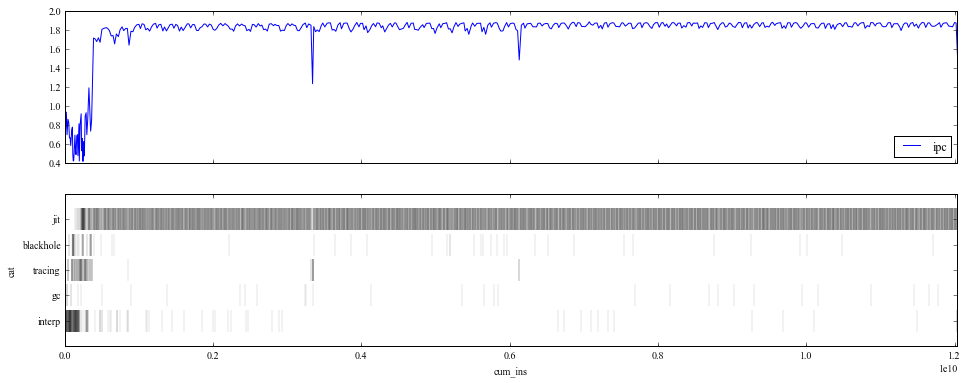

In [63]:
plot_papi_time_breakdown( papi_jit_df, "ai" )

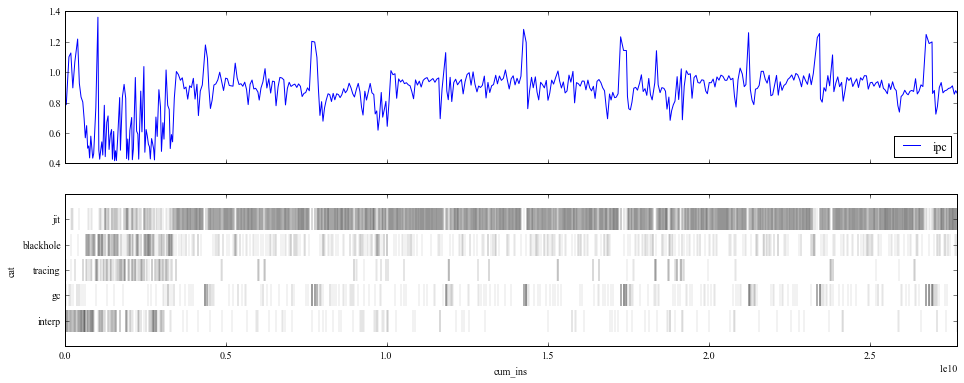

In [64]:
plot_papi_time_breakdown( papi_jit_df, "html5lib" )

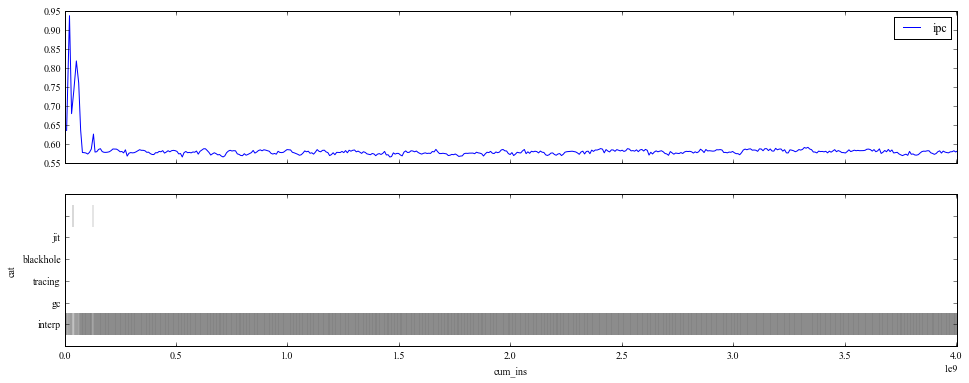

In [65]:
plot_papi_time_breakdown( papi_nojit_df, "ai" )

In [66]:
def get_papi_by_phase_df( df ):
    runs = df.groupby("run").first().index
    papi_by_phase_df = None
    for run in runs:
        print run
        tmp_df = plot_papi_time_breakdown( df, run, get_df=True )
        tmp_df = tmp_df.groupby("curr_phase").sum()
        tmp_df["ipc"] = tmp_df["ins"] / tmp_df["cyc"]
        tmp_df["br_per_inst"] = tmp_df["brc"] / tmp_df["ins"]
        tmp_df["br_miss_rate"] = tmp_df["brcm"] / tmp_df["brc"]
        tmp_df["br_miss_per_inst"] = tmp_df["brcm"] / tmp_df["ins"]
        tmp_df["run"] = run
        if papi_by_phase_df is None:
            papi_by_phase_df = tmp_df
        else:
            papi_by_phase_df = papi_by_phase_df.append( tmp_df )
    return papi_by_phase_df

In [67]:
papi_by_phase_df = get_papi_by_phase_df( papi_jit_df )

ai
bm_chameleon
bm_icbd
bm_mako
bm_mdp
chaos
crypto_pyaes
deltablue
django
eparse
fannkuch
float
genshi_text
genshi_xml
go
hexiom2
html5lib
json_bench
meteor-contest
nbody_modified
pidigits
pyflate-fast
pypy_interp
raytrace-simple
richards
rietveld
slowspitfire
spambayes
spectral-norm
spitfire
spitfire_cstringio
sympy_expand


KeyboardInterrupt: 

In [ ]:
papi_by_phase_df["phase"] = papi_by_phase_df.index

In [ ]:
papi_by_phase_df.groupby("phase").mean()

In [ ]:
papi_by_phase_df.groupby("phase").std()

In [ ]:
papi_by_phase_df_mn = papi_by_phase_df.groupby("phase").mean()
papi_by_phase_df_st = papi_by_phase_df.groupby("phase").std()
for phase in ["interpreter", "tracing", "JIT", "blackhole", "GC"]:
    phase_l = phase[0].lower()
    mn = papi_by_phase_df_mn.loc[phase_l]
    st = papi_by_phase_df_st.loc[phase_l]
    print "{} & {:0.2f} ({:0.2f}) & {:0.0f} ({:0.0f}) & {:0.1f} ({:0.1f}) \\\\".format(
            phase, mn.ipc, st.ipc, 1000.0 * mn.br_per_inst, 1000.0 * st.br_per_inst, 
            1000.0 * mn.br_miss_rate, 1000.0 * st.br_per_inst )

In [ ]:
papi_by_phase_df_mn.loc["b"]

In [ ]:
papi_by_phase_df

In [ ]:
plot_papi_time_breakdown( papi_nojit_df, "twisted_names" )

In [ ]:
plot_papi_time_breakdown( papi_jit_df, "richards" )